**Lab2-DL: F1-TabPFN-intro.ipynb** (ELMED219) | Prioritet: 4 (avansert)

# 🧠 TabPFN: Dyp læring på tabelldata – en revolusjon for medisinsk forskning

_Utforskning av TabPFN v2.5 – den nyeste generasjonen av Prior-Data Fitted Networks_

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/F1-TabPFN-intro.ipynb)


Sist oppdatert: 2025-12-04, A. Lundervold

Bruk `elmed219-2026` conda-miljøet eller Google Colab

**Denne notebooken bruker TabPFN v2.5** – den nyeste versjonen med støtte for opptil 50 000 rader og 2 000 features.

> 📚 **Læringsmål:** Etter å ha fullført denne notebooken skal du kunne:
> - Forstå hva TabPFN er og hvorfor det er relevant for medisinsk forskning
> - Bruke TabPFN til klassifikasjon og regresjon på tabulære data
> - Sammenligne TabPFN med tradisjonelle metoder som XGBoost og Random Forest
> - Tolke resultatene og forstå usikkerhetsestimater

---

## 🏥 Hvorfor TabPFN er viktig for fremtidens lege

Som medisinstudent vil du møte maskinlæring i stadig flere kliniske sammenhenger – fra diagnostisk beslutningsstøtte til prediksjon av behandlingsrespons. TabPFN representerer et gjennombrudd som gjør avansert AI tilgjengelig for medisinske datasett av den størrelsen vi faktisk har i klinisk forskning.

### Hva er TabPFN?

**TabPFN** (Tabular Prior-data Fitted Network) er en dyp læringsmodell utviklet av [Prior Labs](https://priorlabs.ai/) som er **spesialdesignet for tabulære data** – altså data i tabellform som pasientjournaler, laboratorieverdier og registerstudier.

> 💡 **Klinisk analogi:** Tenk på TabPFN som en erfaren overlege som har «sett» millioner av pasienter (syntetiske datasett) og dermed kan gjenkjenne mønstre selv med bare noen få nye pasienter. Tradisjonelle metoder er som en nyutdannet lege som må lære alt fra bunnen av for hver ny pasientgruppe.

### TabPFN v2.5 – Nøkkelegenskaper

| Egenskap | Verdi | Klinisk relevans |
|----------|-------|------------------|
| **Maks antall pasienter** | 50 000 | Dekker de fleste registerstudier |
| **Maks antall variabler** | 2 000 | Plass til omfattende biomarkørpaneler |
| **Treningstid** | Sekunder | Rask iterasjon i forskning |
| **Hyperparametertuning** | Ikke nødvendig | Mindre ekspertise kreves |
| **Manglende data** | Håndteres automatisk | Vanlig i kliniske data |
| **Usikkerhetsestimater** | Innebygd | Kritisk for klinisk bruk |

### Hvorfor er dette viktig for medisin?

#### 1. 🎯 **Små datasett er normen i medisin**
- Sjeldne sykdommer: Ofte bare 50-200 pasienter tilgjengelig
- Pilotstudier: Begrenset finansiering og tid
- Subgruppeanalyser: Færre pasienter når man stratifiserer

TabPFN utkonkurrerer tradisjonelle metoder nettopp på små datasett!

#### 2. ⏱️ **Hastighet muliggjør klinisk integrasjon**
- Tradisjonelle metoder: Timer med hyperparametertuning
- TabPFN: Sekunder til resultater
- Betyr: Kan brukes i sanntidsbeslutninger

#### 3. 🔬 **Anvendelser i klinisk praksis**

| Område | Eksempel |
|--------|----------|
| **Diagnostikk** | Prediksjon av Alzheimers fra håndskriftanalyse |
| **Prognose** | Estimering av overlevelse ved kreft |
| **Behandlingsvalg** | Prediksjon av respons på immunterapi |
| **Screening** | Identifisering av høyrisikopasienter |

#### 4. 📊 **Håndterer typiske utfordringer med kliniske data**
- Blanding av numeriske verdier (labverdier) og kategoriske data (kjønn, røykestatus)
- Manglende verdier (pasienter som ikke møtte til kontroll)
- Skjeve klassefordelinger (sjeldne utfall)



## 🔬 Hvordan fungerer TabPFN? – En teknisk forklaring for nysgjerrige

> ⚠️ **For den interesserte:** Denne seksjonen forklarer den tekniske arkitekturen. Du trenger ikke forstå alt her for å bruke TabPFN effektivt!

### Problemet med tradisjonell dyp læring på tabelldata

Historisk har dyp læring (nevrale nettverk) slitt med tabulære data:
- **Neurale nettverk** trenger typisk tusenvis av eksempler for å lære
- **Tre-baserte metoder** (XGBoost, Random Forest) har dominert på tabelldata
- **Hyperparametertuning** er tidkrevende og krever ekspertise

### TabPFNs revolusjonerende løsning: In-Context Learning

TabPFN bruker samme prinsipp som store språkmodeller (LLMs) som ChatGPT – **in-context learning** (læring i kontekst):

```
┌─────────────────────────────────────────────────────────────────┐
│  TRADISJONELL MASKINLÆRING          TabPFN                      │
│  ─────────────────────────          ──────                      │
│  1. Se på treningsdata              1. Modellen er ferdigtrent  │
│  2. Oppdater vekter gradvis         2. Nye data gis som "prompt"│
│  3. Gjenta 1000+ ganger             3. Ett enkelt forward pass  │
│  4. Lag prediksjoner                4. Ferdig!                  │
│                                                                 │
│  Tid: Minutter til timer            Tid: Sekunder               │
└─────────────────────────────────────────────────────────────────┘
```

> 💡 **Analogi:** Tradisjonell ML er som å lære et nytt språk fra bunnen av. TabPFN er som ChatGPT – den «kan» allerede språket og trenger bare kontekst for å forstå oppgaven.

### Transformer-arkitekturen

TabPFN bruker en modifisert **transformer** (samme arkitektur som i GPT og BERT):

1. **Toveis oppmerksomhet (Two-way attention):**
   - Oppmerksomhet på tvers av **variabler** (features) i hver rad
   - Oppmerksomhet på tvers av **pasienter** (samples) for hver variabel

2. **Treningsdata:** Forhåndstrent på ~130 millioner syntetiske datasett
   - Bruker strukturelle kausale modeller
   - Lærer generelle mønstre som finnes i alle typer tabelldata

### Hvorfor TabPFN v2.5 er bedre

| Versjon | Maks rader | Maks features | Forbedringer |
|---------|------------|---------------|--------------|
| v1 (2022) | 1 000 | 100 | Opprinnelig |
| v2 (2024) | 10 000 | 500 | Regresjon, bedre skalering |
| **v2.5 (2025)** | **50 000** | **2 000** | Raskere, mer nøyaktig |

### Praktiske fordeler sammenlignet med alternativer

| Aspekt | TabPFN | XGBoost/CatBoost | Random Forest |
|--------|--------|------------------|---------------|
| **Treningstid** | Sekunder | Minutter-timer | Sekunder-minutter |
| **Hyperparametre** | Ingen | Mange (10+) | Noen (5+) |
| **Små datasett** | ⭐⭐⭐ | ⭐⭐ | ⭐⭐ |
| **Store datasett** | ⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ |
| **Usikkerhet** | Innebygd | Må legges til | Må legges til |
| **Manglende data** | Automatisk | Manuell håndtering | Manuell håndtering |

## 🚀 La oss komme i gang med TabPFN!

Velkommen til den praktiske delen av notebooken!

Denne koden viser hvordan du installerer og kjører TabPFN lokalt (med GPU-støtte). For rask inferens med ekstra funksjoner, se [TabPFN online-klient](https://tinyurl.com/tabpfn-colab-online).

### Før du starter

**I Google Colab:**
1. Kopier notebooken til din egen Google Drive (Fil → Lagre en kopi i Drive)
2. Aktiver GPU: Kjøretid → Endre kjøretidstype → GPU

**Lokalt:**
Bruk `elmed219-2026` conda-miljøet som allerede har TabPFN installert.

---

> 🔵 **Tips:** Aktiver innholdsfortegnelsen med `☰`-ikonet øverst til venstre for bedre navigering.

---

*Denne notebooken er basert på arbeid av [Lennart Purucker](https://github.com/LennartPurucker) og [Prior Labs](https://priorlabs.ai/).*

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


# 📦 Installasjon

Kjør cellene nedenfor for å installere TabPFN v2.5 og nødvendige avhengigheter.

> ⚠️ **Merk:** Start kjøretiden på nytt etter installasjon hvis Colab ber om det.

In [2]:
if is_colab:
    # ============================================================
    # INSTALLASJON FOR GOOGLE COLAB
    # ============================================================
    
    # Installer TabPFN v2.5 (nyeste versjon)
    # --upgrade sikrer at vi får den aller nyeste versjonen
    !pip install --upgrade tabpfn
    
    # Installer PyTorch Geometric (for grafbaserte utvidelser)
    !pip install torch-geometric

    # TabPFN Extensions: Ekstra funksjonalitet som:
    # - Post-hoc ensembler (kombinerer flere modeller)
    # - Tolkningsverktøy (interpretability)
    # - Hyperparameteroptimalisering
    !pip install tabpfn-extensions

    # Installer hyperopt for hyperparameteroptimalisering
    !pip install hyperopt

    # Installer baseline-modeller for sammenligning
    !pip install catboost xgboost

    # Installer datasett-bibliotek
    !pip install datasets
    
    print("✅ Installasjon fullført! TabPFN v2.5 er klar til bruk.")
else:
    print("Kjører lokalt – TabPFN skal allerede være installert via conda-miljøet.")
    print("Hvis ikke, kjør: pip install --upgrade tabpfn tabpfn-extensions")


Kjører lokalt – TabPFN skal allerede være installert via conda-miljøet.
Hvis ikke, kjør: pip install --upgrade tabpfn tabpfn-extensions


**⚡ Start kjøretiden på nytt nå** (Kjøretid → Start kjøretiden på nytt)

### 📚 Nødvendige imports

Eksemplene i denne notebooken krever følgende biblioteker. **Kjør denne cellen før du fortsetter.**

> 💡 **Forklaring av bibliotekene:**
> - `pandas` / `numpy`: Datamanipulering og numeriske beregninger
> - `sklearn`: Maskinlæringsverktøy og evalueringsmetrikker
> - `tabpfn`: TabPFN-modellen vi skal utforske
> - `xgboost` / `catboost`: Baseline-modeller for sammenligning
> - `shap`: Tolkningsverktøy for å forstå prediksjonene



#### 🖥️ GPU-akselerasjon (anbefalt)

TabPFN støtter flere akseleratorer:

| Plattform | Akselerator | Device-navn |
|-----------|-------------|-------------|
| **Google Colab** | NVIDIA GPU | `cuda` |
| **Linux/Windows** | NVIDIA GPU | `cuda` |
| **Apple Silicon** (M1/M2/M3/M4) | Metal | `mps` |
| **Uten GPU** | CPU | `cpu` |

**Oppsett:**
* **Google Colab:** Kjøretid → Endre kjøretidstype → GPU
* **Apple Silicon:** Fungerer automatisk med MPS (Metal Performance Shaders)
* **NVIDIA:** Sørg for at CUDA er installert

> 💡 Notebooken detekterer automatisk beste tilgjengelige akselerator!

In [ ]:
# ============================================================
# IMPORTS - Nødvendige biblioteker
# ============================================================

import os
import requests
from io import StringIO
from urllib.error import URLError

# Databehandling og numeriske operasjoner
import pandas as pd
import numpy as np

# Scikit-learn: Datasett og evaluering
from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,           # Andel korrekte prediksjoner
    mean_absolute_error,      # Gjennomsnittlig absolutt feil (regresjon)
    mean_squared_error,       # Gjennomsnittlig kvadratisk feil (regresjon)
    root_mean_squared_error,  # Rot av MSE (regresjon)
    r2_score,                 # Forklart varians (regresjon)
    roc_auc_score,            # Areal under ROC-kurven (klassifikasjon)
)

# Visualisering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# Datasett fra OpenML
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline-modeller for sammenligning
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

# PyTorch og grafnettverk
import torch
import torch_geometric

# SHAP for modelltolkning
import shap

# ============================================================
# TabPFN - Hovedmodellen vi skal utforske!
# ============================================================
from tabpfn import TabPFNClassifier, TabPFNRegressor

# ============================================================
# AUTOMATISK DEVICE-DETEKSJON (CUDA / MPS / CPU)
# ============================================================
def get_device():
    """
    Detekterer beste tilgjengelige akselerator.
    Prioritet: CUDA (NVIDIA) > MPS (Apple Silicon) > CPU
    """
    if torch.cuda.is_available():
        return 'cuda'
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        return 'mps'
    else:
        return 'cpu'

# Sett DEVICE som global variabel for bruk i hele notebooken
DEVICE = get_device()

# Vis informasjon om valgt akselerator
print("=" * 60)
print("AKSELERATOR-INFORMASJON")
print("=" * 60)

if DEVICE == 'cuda':
    print(f"✅ NVIDIA GPU tilgjengelig: {torch.cuda.get_device_name(0)}")
    print(f"   Minne: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
elif DEVICE == 'mps':
    print(f"✅ Apple Silicon (MPS) tilgjengelig")
    print(f"   Bruker Metal Performance Shaders for akselerasjon")
else:
    print("⚠️ Ingen GPU funnet – bruker CPU")
    print("   TabPFN vil fungere, men tregere på store datasett")

print(f"\n🎯 Valgt device: '{DEVICE}'")
print("=" * 60)

In [4]:
print("torch:", torch.__version__)
print("torch_geometric:", torch_geometric.__version__)
print("shap:", shap.__version__)
print("torch.cuda.is_available():", torch.cuda.is_available())
print("torch.cuda.get_device_name(0):", torch.cuda.get_device_name(0))
print("torch.cuda.get_device_properties(0):", torch.cuda.get_device_properties(0))

torch: 2.5.1
torch_geometric: 2.6.1
shap: 0.46.0
torch.cuda.is_available(): True
torch.cuda.get_device_name(0): Quadro RTX 6000
torch.cuda.get_device_properties(0): _CudaDeviceProperties(name='Quadro RTX 6000', major=7, minor=5, total_memory=24190MB, multi_processor_count=72, uuid=e1947619-d6af-4100-3bcc-914868e19f5b, L2_cache_size=6MB)


# 🎯 Prediksjoner med TabPFN

La oss starte med noen enkle eksempler! Vi bruker først [eksempeldatasett fra scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html) for å demonstrere hvordan TabPFN fungerer.

> 💡 **Klinisk relevans:** Disse eksempeldatasettene inkluderer medisinske data som:
> - **Breast Cancer Wisconsin**: Klassifikasjon av brystkreftsvulster (godartet/ondartet)
> - **Parkinsons**: Prediksjon av Parkinsons sykdom fra stemmemålinger
> - **Diabetes**: Prediksjon av sykdomsprogresjon

## 📊 Klassifikasjon

Vi sammenligner nå klassifikasjonsytelsen til TabPFN mot etablerte metoder:
- [**XGBoost**](https://xgboost.readthedocs.io/en/stable/): Gradient boosting – industristandard for tabulære data
- [**CatBoost**](https://catboost.ai/): Gradient boosting optimalisert for kategoriske data
- **Random Forest**: Ensemble av beslutningstrær

### Evalueringsmetrikk: ROC AUC

Vi bruker [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) (Area Under the Receiver Operating Characteristic Curve) som hovedmetrikk.

> 📚 **Hva er ROC AUC?**
> - **ROC-kurven** viser avveiningen mellom sensitivitet (true positive rate) og spesifisitet (1 - false positive rate)
> - **AUC** = arealet under kurven, fra 0 til 1
> - **AUC = 0.5**: Modellen er like god som å gjette tilfeldig
> - **AUC = 1.0**: Perfekt klassifikasjon
> - **AUC > 0.8**: Generelt ansett som god ytelse i klinisk sammenheng

*Merk: Disse eksempeldatasettene er relativt enkle, så vi forventer høy ROC AUC.*

In [23]:
def load_dataset(dataset_name='breast_cancer', fallback='iris'):
    """
    Load a dataset with fallback option if OpenML fails
    
    Parameters:
    -----------
    dataset_name : str
        Name of OpenML dataset to try first
    fallback : str
        Name of sklearn built-in dataset to use as fallback
        Options: 'iris', 'breast_cancer', 'diabetes'
        
    Returns:
    --------
    X : array-like
        Features
    y : array-like 
        Target variable
    """
    try:
        # Try OpenML first
        df = fetch_openml(dataset_name)
        return df.data, df.target
        
    except (URLError, TimeoutError) as e:
        print(f"Error fetching {dataset_name} from OpenML: {e}")
        print(f"Using sklearn's built-in {fallback} dataset instead...")
        
        # Fallback to sklearn built-in dataset
        if fallback == 'breast_cancer':
            from sklearn.datasets import load_breast_cancer
            data = load_breast_cancer()
        elif fallback == 'diabetes':
            from sklearn.datasets import load_diabetes 
            data = load_diabetes()
        elif fallback == 'iris':
            from sklearn.datasets import load_iris
            data = load_iris()
        else:
            raise ValueError(f"Unknown fallback dataset: {fallback}. Choose from: 'iris', 'breast_cancer', 'diabetes'")
            
        return data.data, data.target

In [24]:
# Import the Parkinson's dataset from sklearn.datasets
from sklearn.datasets import make_classification

def create_parkinsons_dataset():
    """
    Create a synthetic Parkinson's-like dataset since scikit-learn doesn't have 
    the real Parkinson's dataset built-in.
    
    Returns:
    --------
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values (0 for healthy, 1 for Parkinson's).
    """
    # Create synthetic data with similar properties to Parkinson's dataset
    # (195 samples, 22 features, binary classification)
    X, y = make_classification(
        n_samples=195,
        n_features=22,
        n_redundant=0,
        n_informative=15,
        random_state=42,
        n_clusters_per_class=2,
        class_sep=0.8
    )
    return X, y

# Load data
try:
    # First try the synthetic Parkinson's dataset
    X, y = create_parkinsons_dataset()
    dataset_name = "Synthetic Parkinson's"
except:
    # If that fails, fall back to iris dataset
    print("Using iris dataset as fallback...")
    from sklearn.datasets import load_iris
    data = load_iris()
    X, y = data.data, data.target
    dataset_name = "Iris"

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset info
print(f"Dataset: {dataset_name}")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset: Synthetic Parkinson's
Dataset shape: (195, 22)
Number of classes: 2


In [25]:
def load_parkinsons_data(fallback_to_breast_cancer=True):
   """
   Download and prepare the Parkinson's Disease dataset from UCI repository.
   
   Parameters:
   -----------
   fallback_to_breast_cancer : bool, default=True
       If True, falls back to breast cancer dataset if Parkinson's data cannot be loaded.
       
   Returns:
   --------
   X : pandas.DataFrame
       Feature matrix
   y : pandas.Series
       Target vector
   dataset_name : str
       Name of the actually loaded dataset ('parkinsons' or 'breast_cancer')
   """
   
   url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
   
   try:
       # Download data with increased timeout
       response = requests.get(url, timeout=30)
       response.raise_for_status()
       
       # Read the CSV data
       df = pd.read_csv(StringIO(response.text))
       
       # Prepare features (X) and target (y)
       X = df.drop(['name', 'status'], axis=1)
       y = df['status']
       
       print("Successfully loaded Parkinson's dataset")
       print(f"Dataset shape: {X.shape}")
       print("\nFeatures:", ', '.join(X.columns))
       print(f"\nClass distribution:\n{y.value_counts(normalize=True).round(3)}")
       
       return X, y, 'parkinsons'

   except (requests.exceptions.RequestException, pd.errors.EmptyDataError) as e:
       print(f"Error downloading/processing Parkinson's data: {e}")
       
       if not fallback_to_breast_cancer:
           raise e
           
       print("Falling back to breast cancer dataset...")
       
       # Fallback to breast cancer dataset
       data = load_breast_cancer()
       X = pd.DataFrame(data.data, columns=data.feature_names)
       y = pd.Series(data.target)
       
       print(f"\nLoaded breast cancer dataset instead")
       print(f"Dataset shape: {X.shape}")
       print(f"Features: {', '.join(data.feature_names)}")
       print(f"\nClass distribution:\n{pd.Series(y).value_counts(normalize=True).round(3)}")
       
       return X, y, 'breast_cancer'

# Example usage:
if __name__ == "__main__":
   import pandas as pd
   from sklearn.datasets import load_breast_cancer
   from sklearn.model_selection import train_test_split
   
   # Load the data
   #X, y, dataset_name = load_parkinsons_data()
   
   # Split the data
   #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
   print(f"\nLoaded {dataset_name} dataset")
   #print("\nData split complete:")
   #print(f"Training set shape: {X_train.shape}")
   #print(f"Test set shape: {X_test.shape}")


Loaded Synthetic Parkinson's dataset


In [26]:
# Explain the data and show examples

# Print dataset info
print(f"Dataset: {dataset_name}")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Since X is a numpy array, we can't access columns directly
# Instead, we can create generic feature names if needed
feature_names = [f"Feature {i+1}" for i in range(X.shape[1])]
print("\nFeature names:")
print(feature_names)

Dataset: Synthetic Parkinson's
Dataset shape: (195, 22)
Number of classes: 2
Training set shape: (156, 22)
Test set shape: (39, 22)

Feature names:
['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15', 'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22']


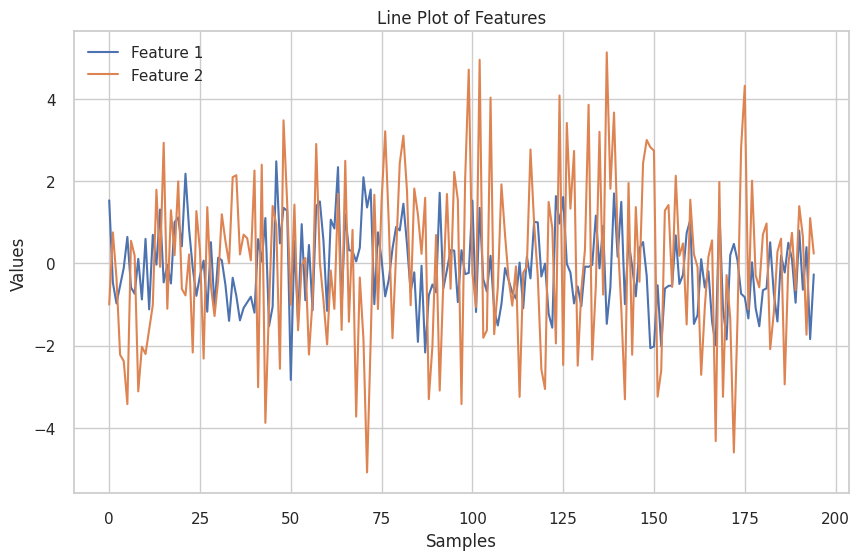

In [27]:
# Make lineplot of some data with their labels
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], label='Feature 1')
plt.plot(X[:, 1], label='Feature 2')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Line Plot of Features')
plt.legend()
plt.show()


In [28]:
X.shape

(195, 22)

In [29]:
%%time
# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
#df = fetch_openml('parkinsons')

# Alternative datasets (commented for reference):

# German Credit Fraud (ID: 31)
# Samples: 1,000
# Features: 20 (account info, credit history, employment)
# Target: Good/Bad credit risk
# df = fetch_openml(data_id=31)

# Cholesterol dataset: Predict cholesterol levels
# Features: Patient characteristics, medical measurements
# Samples: 303 patients
# Target: Cholesterol levels in mg/dl
# df = fetch_openml('cholesterol', version=2, as_frame=True)

# Primary Tumor dataset: Predict tumor type and size
# Features: Patient symptoms, medical test results
# Samples: 339 patients
# Target: Tumor classification and size
# df = fetch_openml('primary-tumor', version=1, as_frame=True) - too many classes!

# Heart Disease dataset (Statlog): Predict presence of heart disease
# Features: Clinical and test measurements
# Samples: 270 patients
# Target: Binary heart disease diagnosis
# df = fetch_openml("heart-statlog", version=1)

# Diabetes dataset: Predict diabetes presence
# Features: Medical measurements, patient history
# Samples: 768 patients
# Target: Binary diabetes diagnosis
#df = fetch_openml("diabetes", version=1)

# Hypothyroid dataset: Predict thyroid condition
# Features: Blood test results, patient symptoms
# Samples: 3772 patients
# Target: Thyroid condition classification
# df = fetch_openml('hypothyroid')

# X, y = df.data, df.target

# Load data with iris as fallback
#X, y = load_dataset('parkinsons', fallback='iris')
X, y, dataset_name = load_parkinsons_data()

# Encode target labels to classes (not needed for iris as it's already encoded)
if not isinstance(y[0], (int, np.integer)):
    le = LabelEncoder()
    y = le.fit_transform(y)

# Convert all categorical columns to numeric (not needed for iris as it's already numeric)
if isinstance(X, pd.DataFrame):
    for col in X.select_dtypes(['category']).columns:
        X[col] = X[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset info
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
if isinstance(X, pd.DataFrame):
    print("\nFeature names:")
    print(X.columns.tolist())

Successfully loaded Parkinson's dataset
Dataset shape: (195, 22)

Features: MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE

Class distribution:
status
1    0.754
0    0.246
Name: proportion, dtype: float64
Dataset shape: (195, 22)
Number of classes: 2
Training set shape: (156, 22)
Test set shape: (39, 22)

Feature names:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
CPU times: user 26.8 ms, sys: 1.34 ms, total: 28.1 ms
Wall time: 967 ms


In [12]:
%%time
# Train and evaluate TabPFN
classifier = TabPFNClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Print confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

TabPFN ROC AUC: 0.9598
TabPFN Accuracy: 0.9487

Confusion Matrix:
[[ 5  2]
 [ 0 32]]
CPU times: user 1.66 s, sys: 263 ms, total: 1.92 s
Wall time: 1.35 s


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

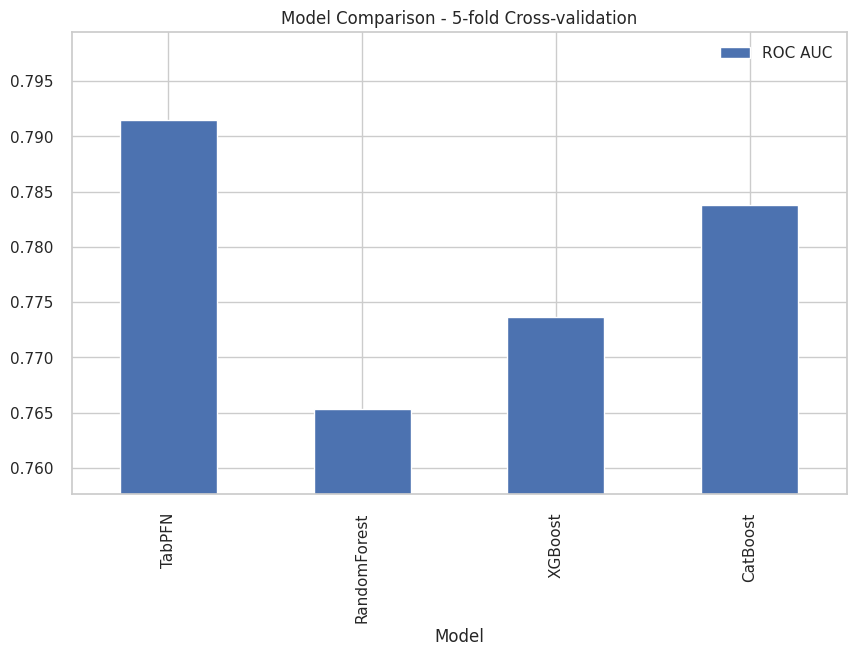

In [30]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation')

### 🏆 Beste kvalitet: Post-Hoc Ensembler (anbefalt bruk)

**Post-hoc ensembler** kombinerer flere TabPFN-modeller med forskjellige konfigurasjoner for å oppnå enda bedre ytelse.

> 💡 **Analogi:** Tenk på det som å få en «second opinion» fra flere leger – en konsensus gir ofte mer pålitelige diagnoser enn én enkelt vurdering.

`AutoTabPFNClassifier` automatiserer denne prosessen og finner den beste kombinasjonen av modeller.

In [ ]:
%%time

from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = AutoTabPFNClassifier(max_time=45, random_state=42, device=DEVICE)  # Kjører i 45 sekunder, lengre tid gir bedre resultater
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("\nBinary (breast cancer)ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Binary (breast cancer)Accuracy", accuracy_score(y_test, predictions))

2025-01-18 23:20:45 INFO     Using `default` preset for Post Hoc Ensemble.
2025-01-18 23:20:45 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-01-18 23:20:45 INFO     Using task type: TaskType.BINARY
2025-01-18 23:20:45 INFO     Obtaining TabPFN models from a random portfolio.
2025-01-18 23:20:45 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_tabpfn_model_13', 'random_rf_pfn_model_14', 'random_rf_pfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_rf_pfn_model_18', 'random_tabpfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_rf_pfn_m


Binary (breast cancer)ROC AUC: 0.9970395954113729
Binary (breast cancer)Accuracy 0.973404255319149
CPU times: user 7min 2s, sys: 8min 8s, total: 15min 11s
Wall time: 1min 45s



Confusion Matrix:
[[ 65   2]
 [  3 118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188


ROC Curve:


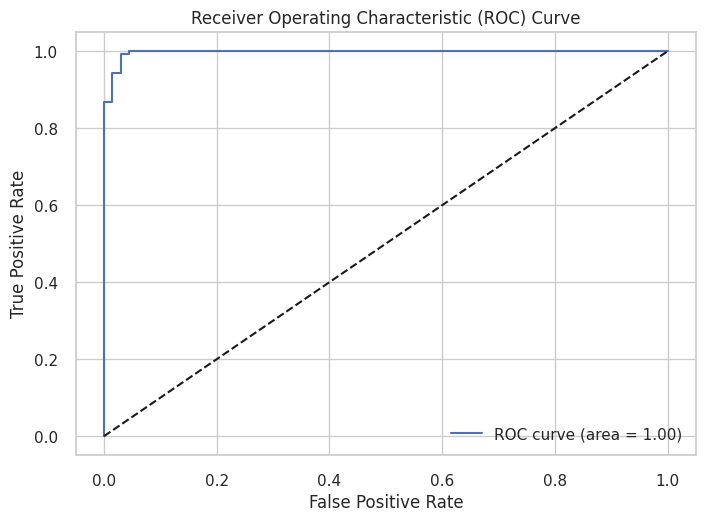

In [32]:
# Display confusion matrix, classification report, and ROC curve

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    roc_curve,
    roc_auc_score
)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nROC Curve:")
fpr, tpr, thresholds = roc_curve(y_test, prediction_probabilities[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, prediction_probabilities[:, 1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 📈 Regresjon

Nå sammenligner vi **regresjonsytelsen** til TabPFN mot XGBoost og CatBoost.

> 📚 **Klassifikasjon vs. Regresjon:**
> - **Klassifikasjon**: Predikerer kategorier (f.eks. syk/frisk, krefttype A/B/C)
> - **Regresjon**: Predikerer kontinuerlige verdier (f.eks. blodtrykk, overlevelsestid, sykdomsprogresjon)

### Evalueringsmetrikker for regresjon

| Metrikk | Forklaring | Tolkning |
|---------|------------|----------|
| **RMSE** | Root Mean Squared Error | Gjennomsnittlig feil i samme enhet som målvariabelen. Lavere er bedre. |
| **MAE** | Mean Absolute Error | Gjennomsnittlig absolutt feil. Mindre sensitiv for uteliggere enn RMSE. |
| **R²** | Forklart varians | Andel av variansen som forklares av modellen (0-1). Høyere er bedre. |

Vi bruker primært **RMSE** ([Root Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html)) som hovedmetrikk.

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and


Loaded diabetes dataset
Dataset shape: (442, 10)

Feature names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Data split complete:
Training set shape: (353, 10)
Test set shape: (89, 10)

Results:
Mean Squared Error: 0.4492
R² Score: 0.4972


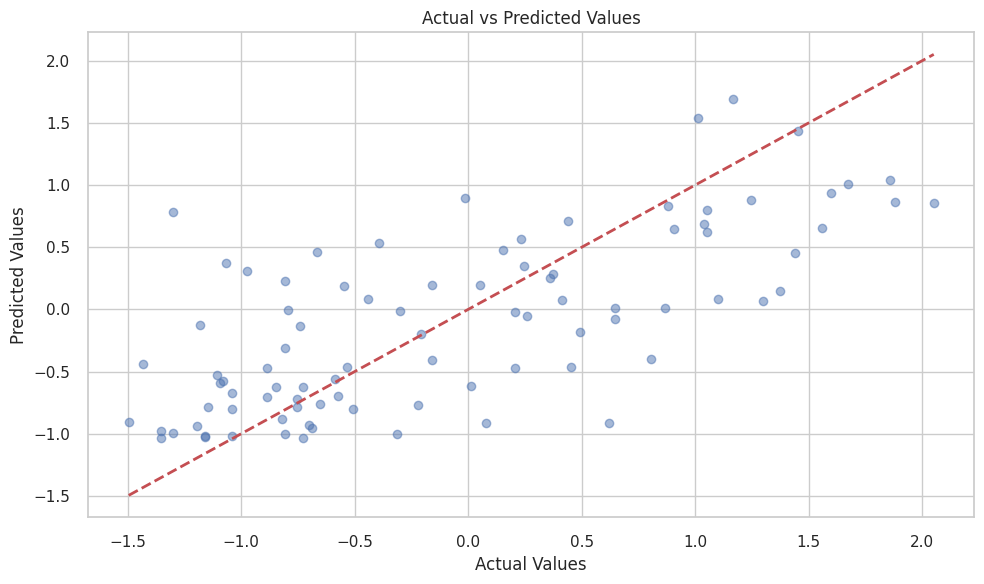

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tabpfn import TabPFNRegressor

def load_dataset(dataset_name='diabetes'):
    """
    Load the diabetes dataset for regression
    
    Returns:
    --------
    X : array-like
        Feature matrix
    y : array-like
        Target vector
    feature_names : list
        Names of features
    """
    try:
        data = load_diabetes()
        X = data.data
        y = data.target
        feature_names = data.feature_names
            
        print(f"\nLoaded {dataset_name} dataset")
        print(f"Dataset shape: {X.shape}")
        print("\nFeature names:")
        print(feature_names)
        
        return X, y, feature_names
        
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None, None, None

# Load data
X, y, feature_names = load_dataset('diabetes')

# Scale the target variable (important for regression)
y = (y - y.mean()) / y.std()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData split complete:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Train TabPFN
regressor = TabPFNRegressor(random_state=42, device=DEVICE)  # Bruker automatisk detektert device
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nResults:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

In [19]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s

#Using scikit-learn's built-in diabetes dataset (since Boston Housing is deprecated)
#df = fetch_openml(data_id=531, as_frame=True)

# Alternative datasets (commented for reference):

# Liver Disorders dataset
# Classification task: Predict liver disorder presence
# Features: Blood test results, alcohol consumption
# Samples: 345 patients
# Target: Binary liver disorder diagnosis
# df = fetch_openml("liver-disorders", version=1)

# Grid Stability dataset
# Regression task: Predict electrical grid stability
# Features: Power system measurements, grid parameters
# Samples: 10,000 simulations
# Target: Grid stability score
#df = fetch_openml(data_id=44973, as_frame=True)

# Concrete Compressive Strength dataset
# Regression task: Predict concrete strength
# Features: Concrete components (cement, water, aggregates)
# Samples: 1,030 concrete samples
# Target: Compressive strength in MPa
#df = fetch_openml(data_id=44959, as_frame=True)

#X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
#for col in X.select_dtypes(['object', 'category']).columns:
#    X[col] = pd.factorize(X[col])[0]  # Factorize encodes as integers

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset description
#display(Markdown(df['DESCR']))

#display(X)

In [ ]:
# Train and evaluate TabPFN
reg = TabPFNRegressor(random_state=42, device=DEVICE)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Variance Explained (R2 Score)
score = root_mean_squared_error(y_test, y_pred)
print(f"TabPFN RMSE: {score:.4f}")

TabPFN RMSE: 0.6702


Compare different machine learning models by training each one multiple times
on different parts of the data and averaging their performance scores for a
 more reliable performance estimate

Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

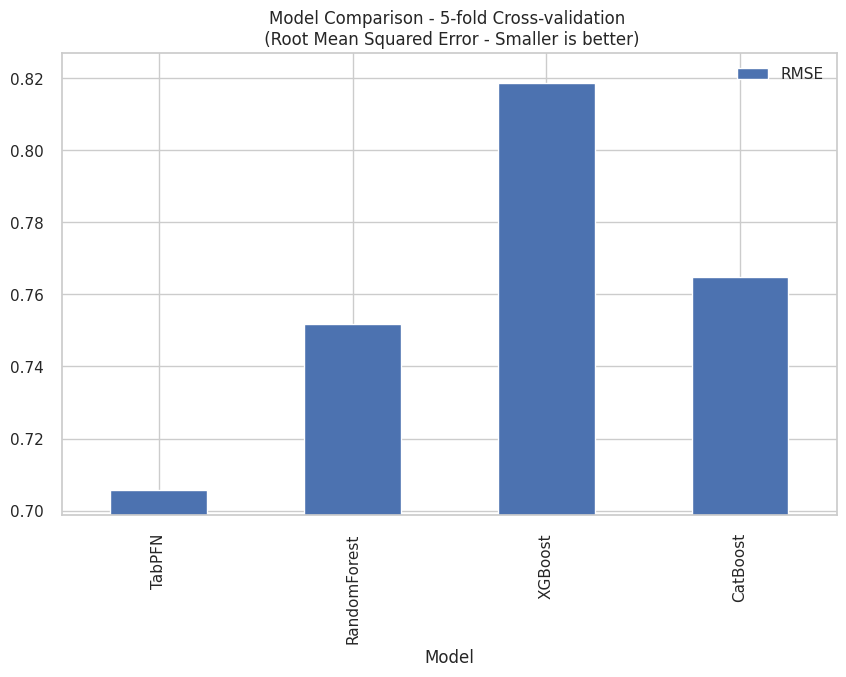

In [ ]:
# Define models
models = [
    ('TabPFN', TabPFNRegressor(random_state=42, device=DEVICE)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'neg_root_mean_squared_error'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=-1).mean()
          for name, model in models}


# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'RMSE'])
df.RMSE = -df.RMSE # Smaller is better
ax = df.plot(x='Model', y='RMSE', kind='bar', figsize=(10, 6))
ax.set_ylim(df['RMSE'].min() * 0.99, df['RMSE'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

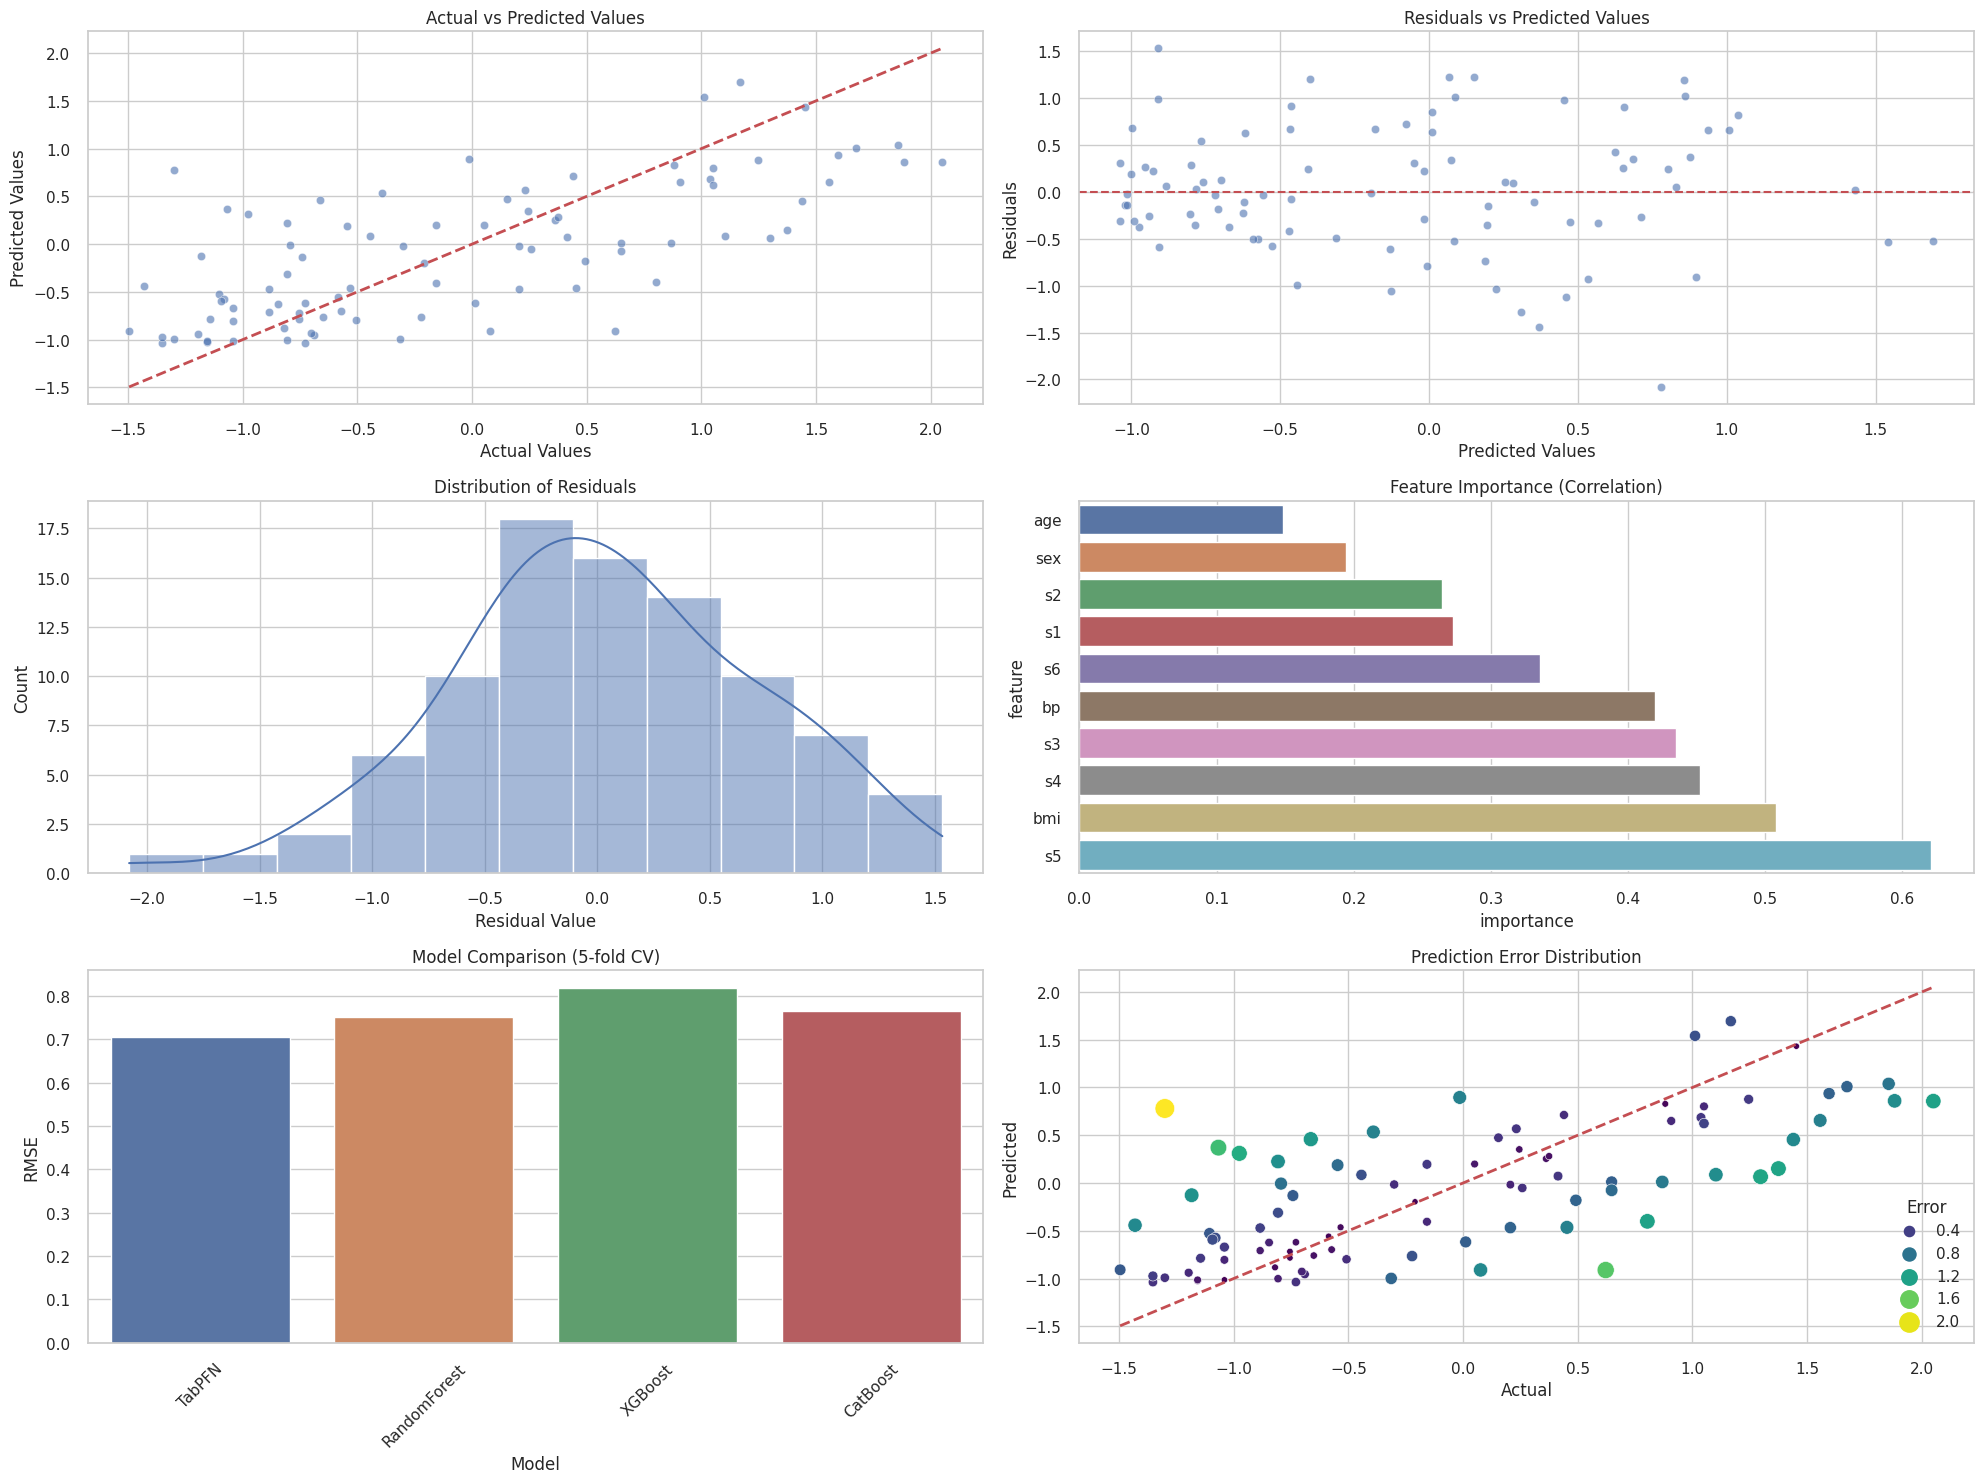


Detailed Model Performance:
--------------------------------------------------
Root Mean Squared Error (RMSE): 0.67
Mean Absolute Error (MAE): 0.53
R-squared (R²): 0.4972

Residuals Statistics:
--------------------------------------------------
Mean of Residuals: 0.02
Standard Deviation of Residuals: 0.67
Skewness of Residuals: -0.19

Model Comparison (5-fold CV RMSE):
--------------------------------------------------
TabPFN       : 0.7064 ± 0.0194
RandomForest : 0.7518 ± 0.0319
XGBoost      : 0.8189 ± 0.0688
CatBoost     : 0.7650 ± 0.0207

Statistical Tests:
--------------------------------------------------
Shapiro-Wilk test p-value: 0.6683
Durbin-Watson statistic: 2.2525

Statistical Test Interpretations:
--------------------------------------------------
Shapiro-Wilk test:
Residuals are normally distributed

Durbin-Watson test:
Values closer to:
0 = Positive autocorrelation
2 = No autocorrelation
4 = Negative autocorrelation
CPU times: user 1.86 s, sys: 1.4 s, total: 3.25 s
Wall 

In [44]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Set modern seaborn theme
sns.set_theme(style="whitegrid")

# Get predictions from TabPFN regressor
predictions = regressor.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# 1. Actual vs Predicted Plot
sns.scatterplot(x=y_test, y=predictions, alpha=0.6, ax=axes[0,0])
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Values')
axes[0,0].set_ylabel('Predicted Values')
axes[0,0].set_title('Actual vs Predicted Values')

# 2. Residuals Plot
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals, alpha=0.6, ax=axes[0,1])
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residuals vs Predicted Values')

# 3. Residuals Distribution
sns.histplot(data=residuals, kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribution of Residuals')
axes[1,0].set_xlabel('Residual Value')
axes[1,0].set_ylabel('Count')

# 4. Feature Importance
feature_importance = pd.DataFrame({
    'feature': load_diabetes().feature_names,
    'importance': np.abs(np.corrcoef(X_test.T, y_test)[:-1, -1])
})
feature_importance = feature_importance.sort_values('importance', ascending=True)
sns.barplot(data=feature_importance, y='feature', x='importance', ax=axes[1,1])
axes[1,1].set_title('Feature Importance (Correlation)')

# 5. Model Comparison
models = {
    'TabPFN': regressor,
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=False)
}

# Perform cross-validation for each model
cv_results = []
for name, model in models.items():
    scores = -cross_val_score(model, X, y, cv=5, 
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1)
    cv_results.append({
        'Model': name,
        'RMSE': scores.mean(),
        'Std': scores.std()
    })

# Create DataFrame for plotting
comparison_df = pd.DataFrame(cv_results)
sns.barplot(data=comparison_df, x='Model', y='RMSE', ax=axes[2,0])
axes[2,0].set_title('Model Comparison (5-fold CV)')
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(), rotation=45)

# 6. Prediction Error Distribution
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Error': np.abs(y_test - predictions)
})
sns.scatterplot(data=error_df, x='Actual', y='Predicted', 
                hue='Error', size='Error', 
                sizes=(20, 200), palette='viridis', ax=axes[2,1])
axes[2,1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axes[2,1].set_title('Prediction Error Distribution')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nDetailed Model Performance:")
print("-" * 50)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Print residuals statistics
print("\nResiduals Statistics:")
print("-" * 50)
print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.2f}")
print(f"Skewness of Residuals: {stats.skew(residuals):.2f}")

# Print model comparison results
print("\nModel Comparison (5-fold CV RMSE):")
print("-" * 50)
for result in cv_results:
    print(f"{result['Model']:12} : {result['RMSE']:.4f} ± {result['Std']:.4f}")

# Additional statistical tests
print("\nStatistical Tests:")
print("-" * 50)
# Shapiro-Wilk test for normality of residuals
_, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")

# Calculate Durbin-Watson manually
diff = np.diff(residuals)
dw = np.sum(diff ** 2) / np.sum(residuals ** 2)
print(f"Durbin-Watson statistic: {dw:.4f}")

# Add interpretation of statistical tests
print("\nStatistical Test Interpretations:")
print("-" * 50)
print("Shapiro-Wilk test:")
print(f"{'Residuals are normally distributed' if p_value > 0.05 else 'Residuals are not normally distributed'}")
print("\nDurbin-Watson test:")
print("Values closer to:")
print("0 = Positive autocorrelation")
print("2 = No autocorrelation")
print("4 = Negative autocorrelation")

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [45]:
%%time
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import warningsshap_values[:,:,1].shape


# Temporarily suppress the FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Load and split data
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)

# Train model
reg = AutoTabPFNRegressor(max_time=45, device='cuda', random_state=42)  # runs for 30 seconds
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

# Calculate metrics using new API
rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print results with nice formatting
print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

SyntaxError: invalid syntax (<unknown>, line 5)

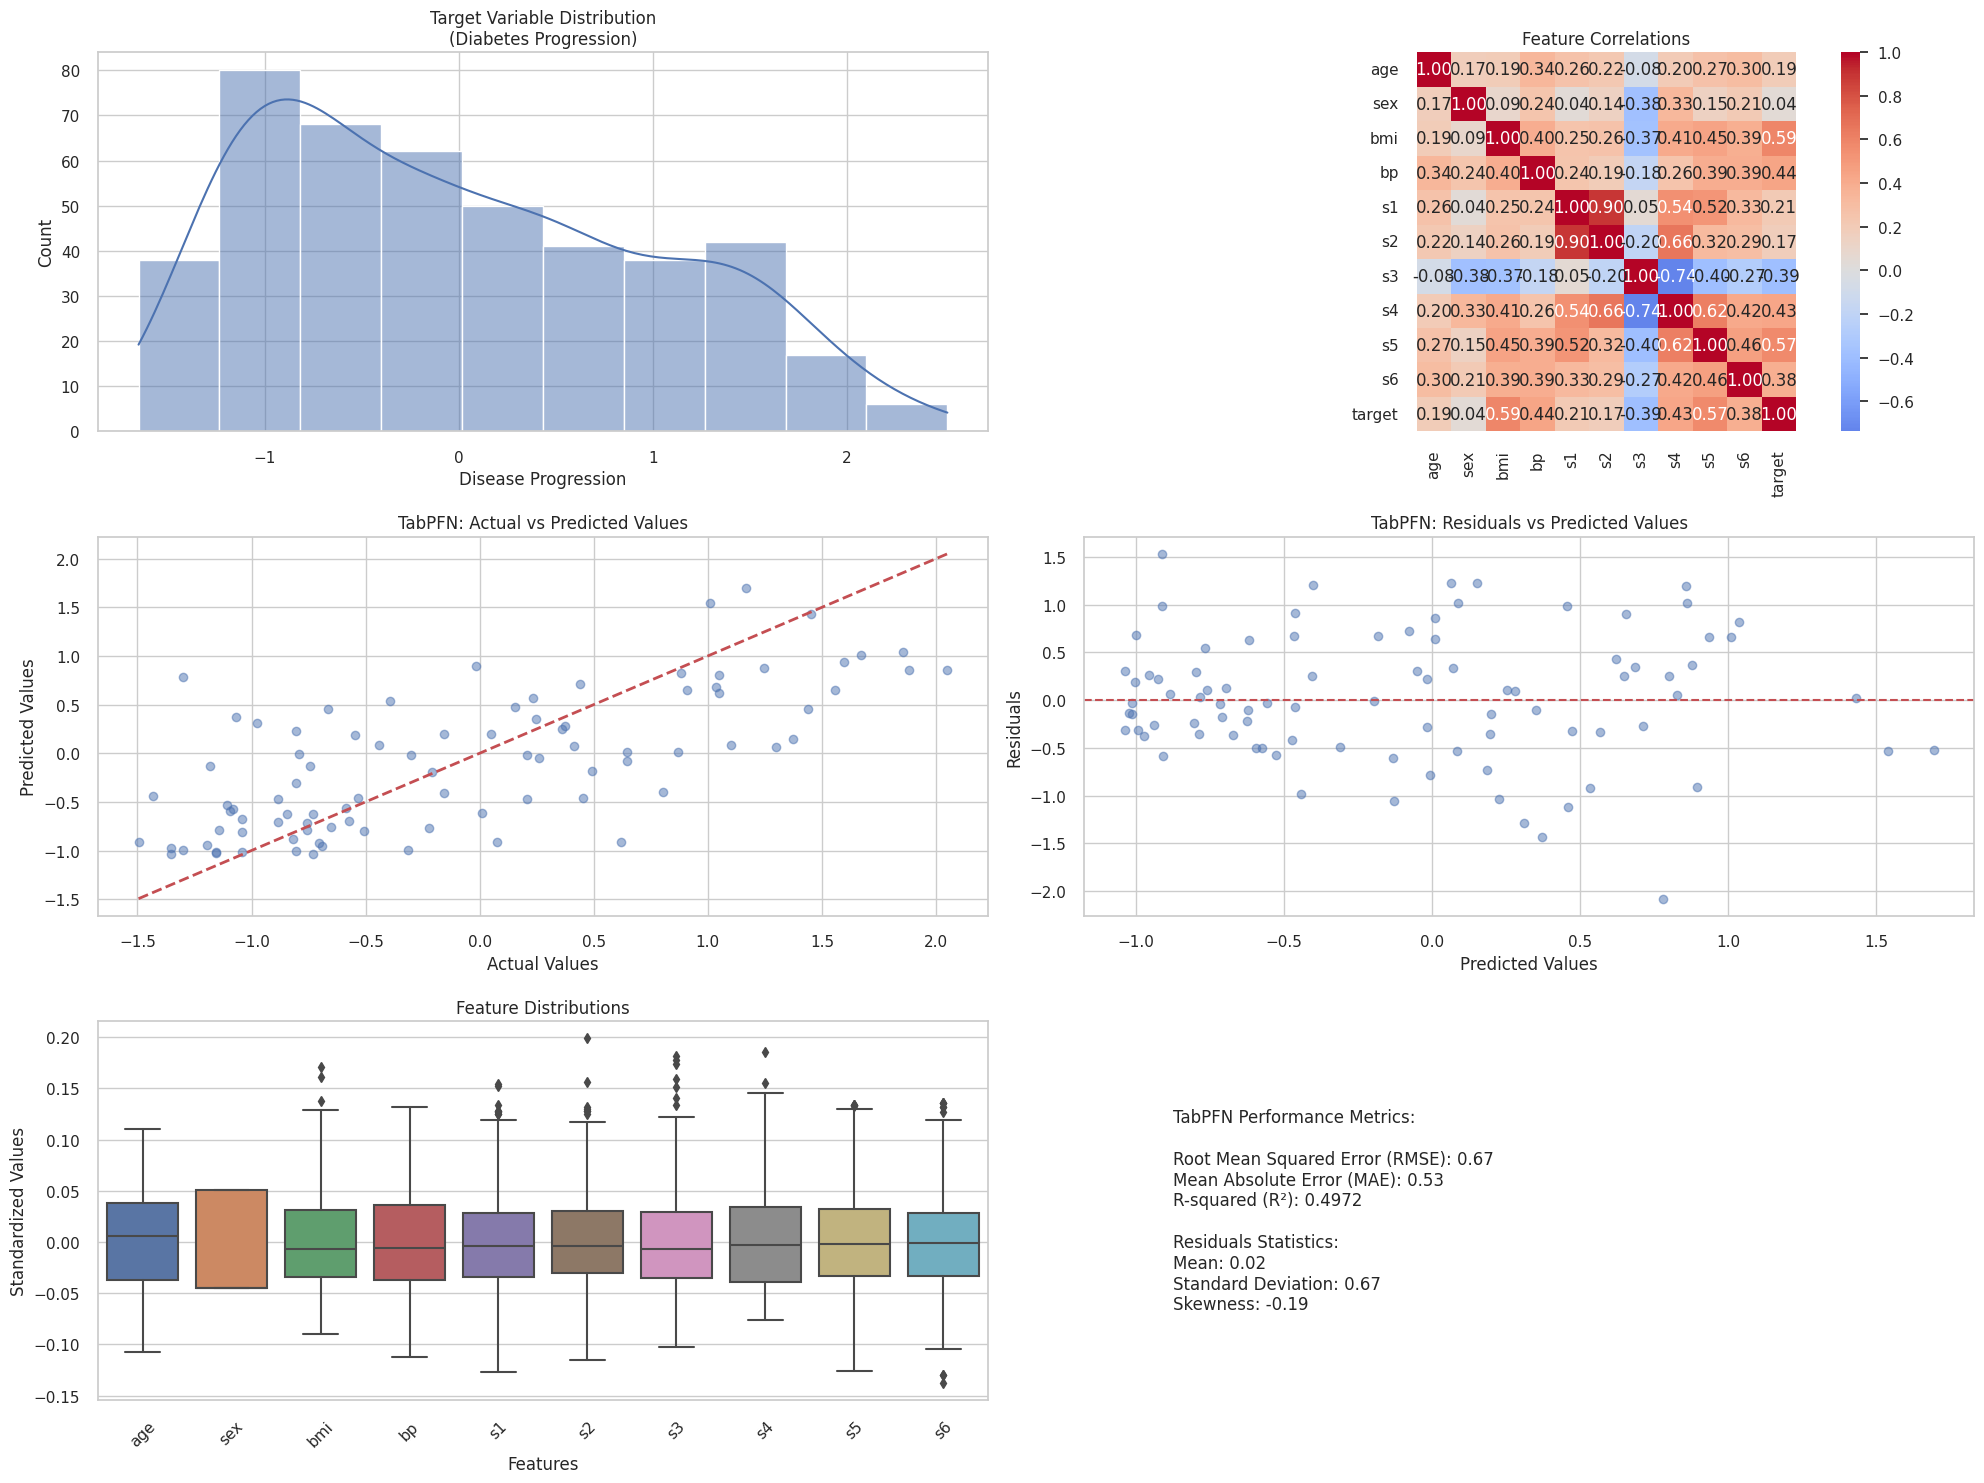


Diabetes Dataset Description:
This dataset predicts disease progression one year after baseline for diabetes patients.

Feature Descriptions:
--------------------------------------------------------------------------------
age................. Age of the patient
sex................. Gender of the patient
bmi................. Body Mass Index
bp.................. Average blood pressure
s1.................. Total serum cholesterol
s2.................. Low-density lipoproteins
s3.................. High-density lipoproteins
s4.................. Total cholesterol / HDL
s5.................. Log of serum triglycerides level
s6.................. Blood sugar level

Target Variable:
--------------------------------------------------------------------------------
Disease Progression: Quantitative measure of disease progression one year after baseline

Dataset Statistics:
--------------------------------------------------------------------------------
Number of Instances: 442
Number of Features: 1

In [46]:
# Illustrate the data and the results

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Get the full dataset description
diabetes = load_diabetes()
dataset_description = diabetes.DESCR

# Create a figure with multiple subplots
# Set seaborn style directly instead of using matplotlib's seaborn style
sns.set_theme(style="whitegrid")  # Modern seaborn styling
fig = plt.figure(figsize=(20, 15))

# 1. Data Distribution Plot
ax1 = plt.subplot(3, 2, 1)
sns.histplot(y, kde=True)
plt.title('Target Variable Distribution\n(Diabetes Progression)')
plt.xlabel('Disease Progression')
plt.ylabel('Count')

# 2. Feature Correlations
ax2 = plt.subplot(3, 2, 2)
data = pd.DataFrame(X, columns=diabetes.feature_names)
data['target'] = y
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', square=True)
plt.title('Feature Correlations')

# 3. Actual vs Predicted
ax3 = plt.subplot(3, 2, 3)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('TabPFN: Actual vs Predicted Values')

# 4. Residuals Plot
ax4 = plt.subplot(3, 2, 4)
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('TabPFN: Residuals vs Predicted Values')

# 5. Feature Distributions
ax5 = plt.subplot(3, 2, 5)
data_melted = data.melt(id_vars=['target'])
sns.boxplot(x='variable', y='value', data=data_melted)
plt.xticks(rotation=45)
plt.title('Feature Distributions')
plt.xlabel('Features')
plt.ylabel('Standardized Values')

# 6. Performance Metrics Text
ax6 = plt.subplot(3, 2, 6)
plt.axis('off')
metrics_text = (
    f"TabPFN Performance Metrics:\n\n"
    f"Root Mean Squared Error (RMSE): {rmse:.2f}\n"
    f"Mean Absolute Error (MAE): {mae:.2f}\n"
    f"R-squared (R²): {r2:.4f}\n\n"
    f"Residuals Statistics:\n"
    f"Mean: {np.mean(residuals):.2f}\n"
    f"Standard Deviation: {np.std(residuals):.2f}\n"
    f"Skewness: {stats.skew(residuals):.2f}"
)
plt.text(0.1, 0.5, metrics_text, fontsize=12, va='center')

plt.tight_layout()
plt.show()

# Print detailed dataset information
print("\nDiabetes Dataset Description:")
print("=" * 80)
print("This dataset predicts disease progression one year after baseline for diabetes patients.")
print("\nFeature Descriptions:")
print("-" * 80)
feature_descriptions = {
    'age': "Age of the patient",
    'sex': "Gender of the patient",
    'bmi': "Body Mass Index",
    'bp': "Average blood pressure",
    's1': "Total serum cholesterol",
    's2': "Low-density lipoproteins",
    's3': "High-density lipoproteins",
    's4': "Total cholesterol / HDL",
    's5': "Log of serum triglycerides level",
    's6': "Blood sugar level"
}

for name, description in feature_descriptions.items():
    print(f"{name:.<20} {description}")

print("\nTarget Variable:")
print("-" * 80)
print("Disease Progression: Quantitative measure of disease progression one year after baseline")

print("\nDataset Statistics:")
print("-" * 80)
print(f"Number of Instances: {X.shape[0]}")
print(f"Number of Features: {X.shape[1]}")
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")

print("\nFeature Statistics:")
print("-" * 80)
stats_df = pd.DataFrame({
    'Mean': data.mean(),
    'Std': data.std(),
    'Min': data.min(),
    'Max': data.max()
})
print(stats_df)

print("\nModel Configuration:")
print("-" * 80)
print(f"Model: TabPFN Regressor")
print(f"Maximum Training Time: 45 seconds")
print(f"Device: CUDA")
print(f"Random State: 42")

print("\nModel Performance:")
print("-" * 80)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")



# Predictive Behavior of TabPFN

In this section, we explore the behavior of predictions from TabPFN on various toy functions.

## Decision Boundary during Classification

First, let us inspect the decision boundary for different classifiers.
The decision bounds show how smoothly a model learns to transition between classes and how well it fits the data.

In the first cell, we create the data and code to plot the decision boundary. The second cell then generates the plot.

In [47]:
# Toy functions that generate the data
def generate_circle(n_datapoints, radius, noise_factor):
    angles = np.linspace(0, 2*np.pi, n_datapoints).T
    x = radius * np.cos(angles) + np.random.randn(n_datapoints) * noise_factor
    y = radius * np.sin(angles) + np.random.randn(n_datapoints) * noise_factor

    return np.stack([x, y]).T

def generate_concentric_cirlces(radii, num_points_per_circle, noise_factor=1/15):
    circles = []
    for r, num_points in zip(radii, num_points_per_circle):
        circles.append(generate_circle(num_points, r, noise_factor))

    circle = np.vstack(circles)
    return circle

def generate_circle_data(num_points_per_circle, radii, noise_factor):
    radii = np.array(radii)
    circles_1 = generate_concentric_cirlces(radii, num_points_per_circle, noise_factor)
    circles_1 = np.hstack([circles_1, np.zeros((sum(num_points_per_circle) , 1))])

    circles_2 = generate_concentric_cirlces(radii + 0.3, num_points_per_circle, noise_factor)
    circles_2 = np.hstack([circles_2, np.ones((sum(num_points_per_circle), 1))])

    circles = np.vstack([circles_1, circles_2])
    X, y = circles[:, :2], circles[:, 2]
    return X, y

# Generate the data
X_train, y_train = generate_circle_data(
  num_points_per_circle=[50, 100, 200],
  radii=[1,2,4],
  noise_factor=0.1
)

# Function for plotting
def plot_decision_boundary(ax, model, model_name):
    cmap = ListedColormap(["#FF0000", "#0000FF"])
    ax.set_title(model_name)
    DecisionBoundaryDisplay.from_estimator(
        model, X_train[:, :2], alpha=0.6, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=plt.cm.RdBu,
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

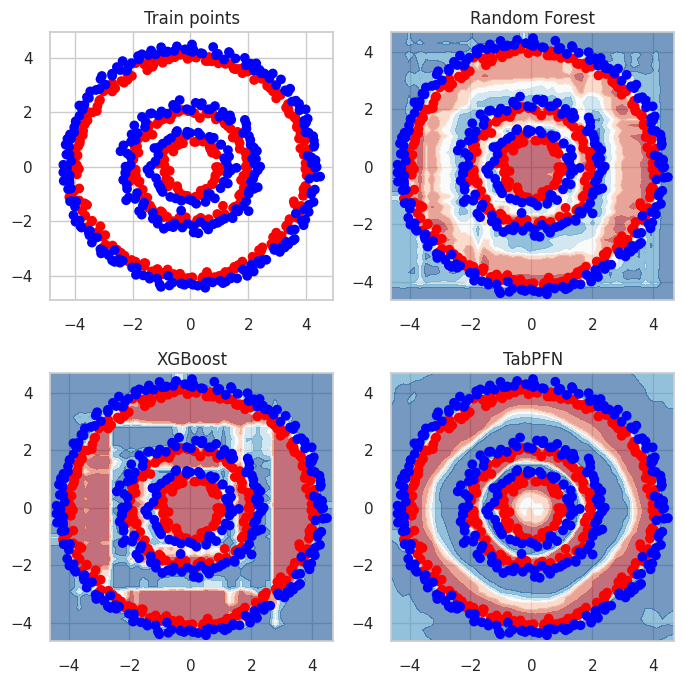

In [48]:
rf = RandomForestClassifier().fit(X_train[:, :2], y_train)
xgb = XGBClassifier().fit(X_train[:, :2], y_train)
tabpfn = TabPFNClassifier().fit(X_train[:, :2], y_train)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(7,7))

# Plot Train Points
ax_points = axes[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(["#FF0000", "#0000FF"]))

# Plot Random Forest
ax_rf = axes[0, 1]
plot_decision_boundary(ax_rf, rf, "Random Forest")

# Plot XGBoost
ax_xgb = axes[1, 0]
plot_decision_boundary(ax_xgb, xgb, "XGBoost")

# Plot TabPFN
ax_tabpfn = axes[1, 1]
plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Sin Curve Fitting with Regression

Next, we investigate the curve-fitting behavior of the different models on a sin curve.

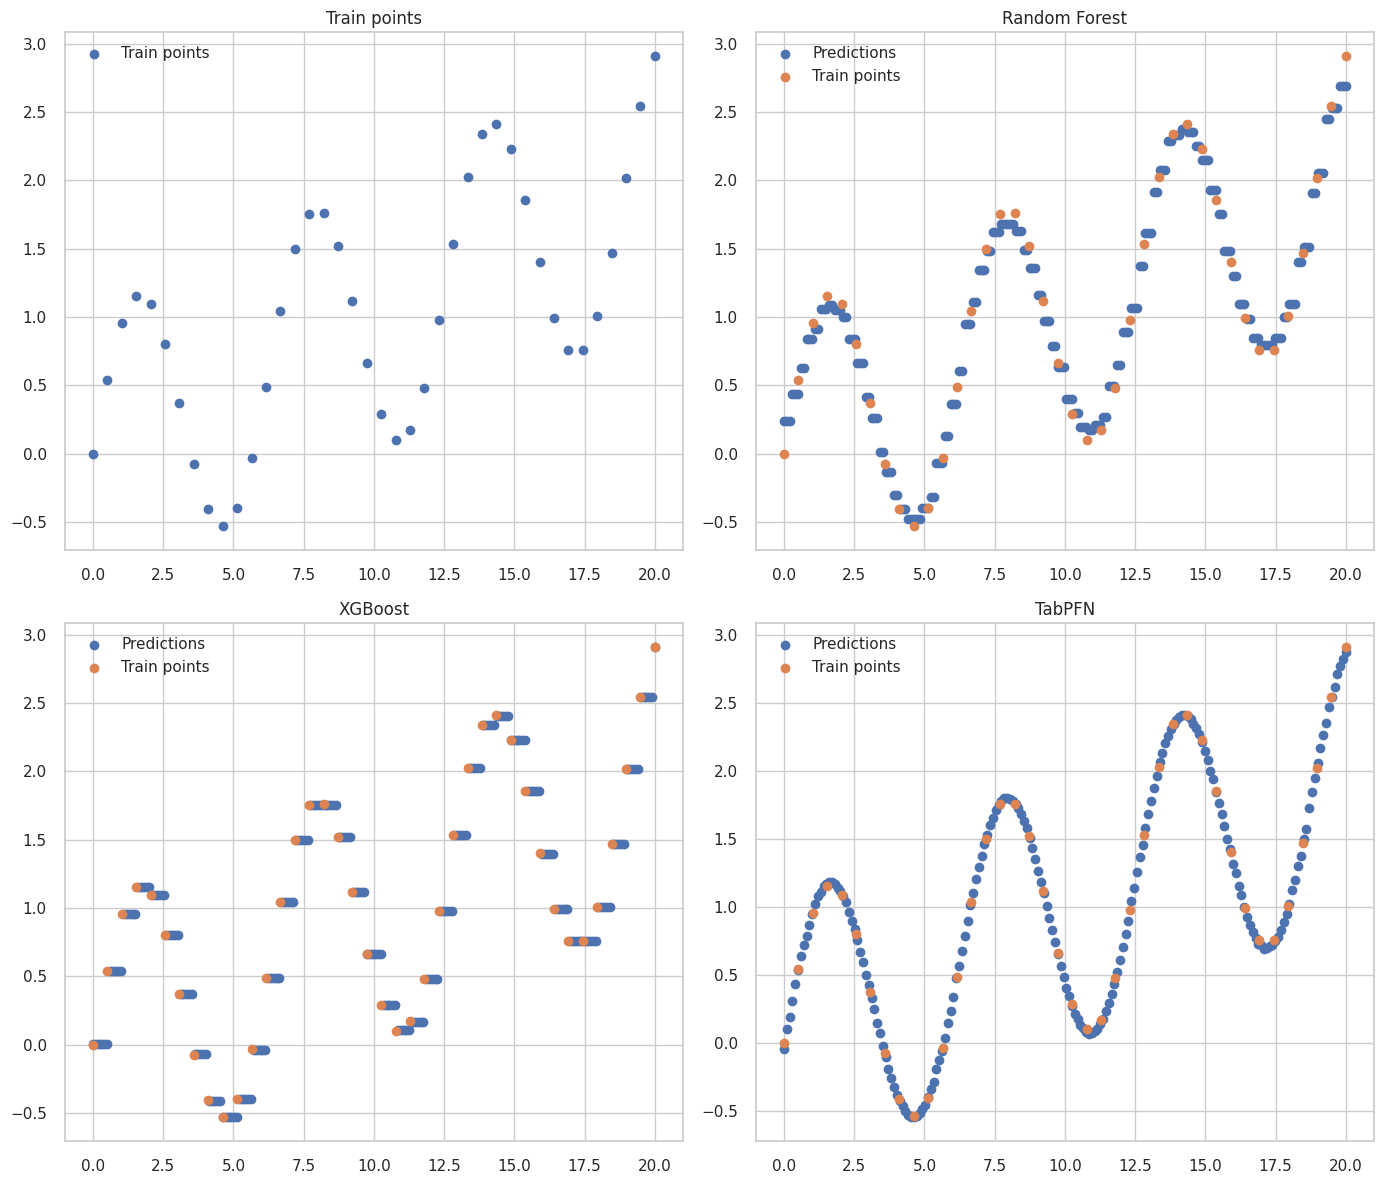

In [49]:
# Toy function to generate data
def generate_sinx_plus_x(N):
    x = np.linspace(0, 20, N)
    y = np.sin(x) + x/10

    return x.reshape(-1, 1), y

# Utility function for plotting
def plot_predictions(ax, model, model_name):
    X_test = np.linspace(0, 20, 200).reshape(-1, 1) # Predict for 200 points  between 0 and 20
    y_preds = model.predict(X_test)
    ax.set_title(model_name)
    ax.scatter(X_test, y_preds, label="Predictions")
    ax.scatter(X_train, y_train, label="Train points")
    ax.legend()

# Generate data
X_train, y_train = generate_sinx_plus_x(N=40)

# Fit Models
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
tabpfn = TabPFNRegressor()
tabpfn.fit(X_train, y_train)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot train points
ax_points = axs[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train, y_train, label="Train points")
ax_points.legend()

# Plot predictions for Random Forest
ax_rf = axs[0, 1]
plot_predictions(ax_rf, rf, "Random Forest")

# Plot predictions for XGBoost
ax_xgb = axs[1, 0]
plot_predictions(ax_xgb, xgb, "XGBoost")

# Plot predictions for TabPFN
ax_tabpfn = axs[1, 1]
plot_predictions(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Uncertainty of TabPFN / Quantile Regresison

---



TabPFN is trained to predict the distribution of the target variable and not just a single point. This is also the case for regression.

As a result, we natively obtain uncertainty for the predictions of TabPFN (without the need for a new model or repeating models for different quantiles).

In the following, we plot the uncertainty of TabPFN for a toy function with noise.

In [50]:
### Code to generate the plot (feel free to ignore)
def plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, full_preds, color_multiplier=5):
  all_quantiles = preds[f"quantiles"]
  y = np.array(all_quantiles) # shape of y: (9, number of samples)

  # Calculate the maximum and minimum values in y
  y_max = np.max(y, axis=0)
  y_min = np.min(y, axis=0)

  # Calculate the widths of each quantile bin
  quantile_bin_widths = np.diff(y, axis=0) # shape of quantile_bin_widths: (8, number of samples)

  # Normalize the bin widths for a given x
  per_x_normalized_bin_widths = (quantile_bin_widths) / (y_max - y_min)

  # Plotting
  num_bins, num_data_points = per_x_normalized_bin_widths.shape[0], per_x_normalized_bin_widths.shape[1]
  rect_width = (x_test[1] - x_test[0]).squeeze() # assuming the x query points are equally spaced out

  for i in range(num_data_points):
      for j in range(num_bins):
          rect_height = quantile_bin_widths[j, i]
          rect = plt.Rectangle(
                    xy=(x_test[i][0] - rect_width / 2, y[j, i]),
                    width=rect_width,
                    height=quantile_bin_widths[j, i],
                    facecolor=plt.cm.viridis(per_x_normalized_bin_widths[j, i] * color_multiplier),
                    edgecolor='none'
                )
          ax.add_patch(rect)

  # Set limits and labels
  ax.plot(x, y_line, label='True line', color='blue')
  ax.set_xlim(min(x_test) - 1, max(x_test) + 1)
  ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

  # ax.plot(x, y, label='True line', color='blue')
  ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)

  plt.title('TabPFN Regression Uncertainty')
  plt.show()

# Generate Data
def generate_line_with_heteroscedastic_noise(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    x = np.linspace(x_start, x_end, num_points)
    noise = np.random.randn(num_points)
    y = m * x
    y_noisy = y + (noise * noise_factor * x)

    return x.reshape(-1, 1), y, y_noisy

def generate_line_with_heteroscedastic_noise_with_gap(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    extra_points = num_points // 3
    x, y, y_noisy = generate_line_with_heteroscedastic_noise(m, num_points+extra_points, x_start, x_end, noise_factor)
    a = np.arange(num_points + extra_points)
    idx = np.where((a < num_points/3) | (a > num_points/3 + extra_points))
    return x[idx], y[idx], y_noisy[idx]

x, y_line, y_noisy = generate_line_with_heteroscedastic_noise_with_gap(0.8)
x_test = np.linspace(0, 100, 200).reshape(-1, 1)

In [51]:
reg = TabPFNRegressor()
reg.fit(x, y_noisy)
preds = reg.predict(x_test, output_type="full")

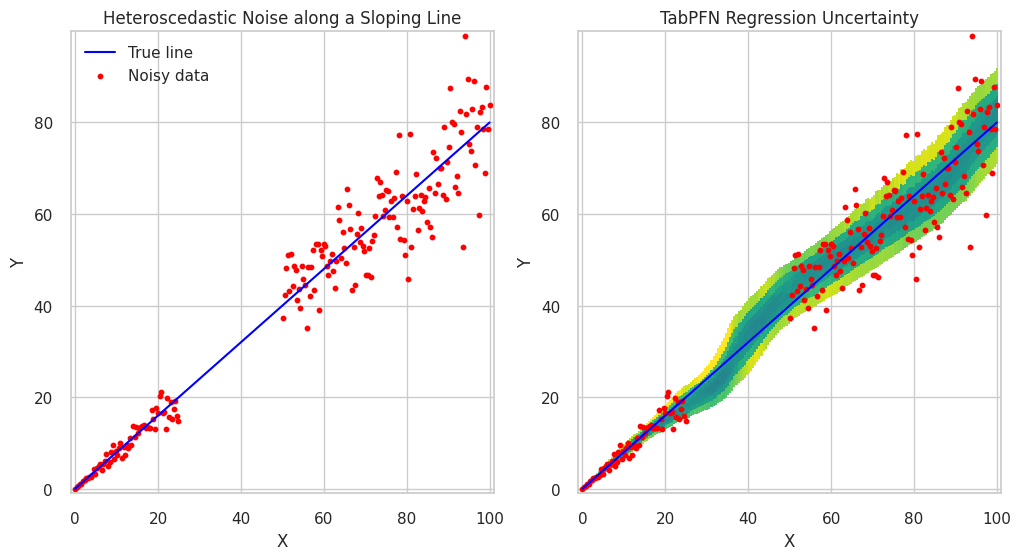

In [52]:
fig = plt.figure(figsize=(12,6))

# Plot the original data
ax = fig.add_subplot(121)
ax.plot(x, y_line, label='True line', color='blue')
ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
ax.set_title('Heteroscedastic Noise along a Sloping Line')
ax.legend()

# plot the uncertainty estimates obtained from TabPFN
ax = fig.add_subplot(122)
plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, preds, color_multiplier=5)

## BATMAN

Na na na na

na na na na

na na na na na

Batman

File ‘thebat.npy’ already there; not retrieving.



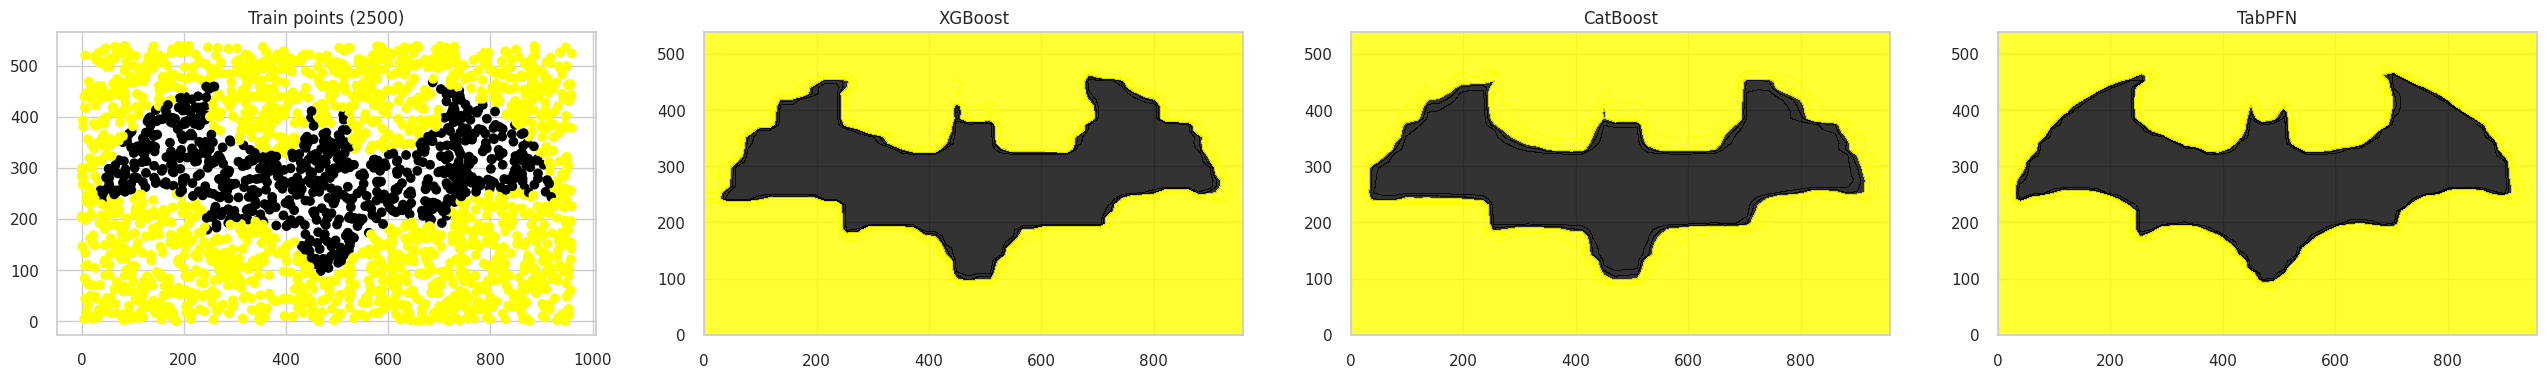

In [53]:
# "Just run this, no questions" - Batman
!wget -nc https://github.com/PriorLabs/TabPFNDemoFiles/raw/main/thebat.npy # download a file we need

def sample_random_points(n, array, seed):
    np.random.seed(seed)
    x, y = np.random.randint(0, array.shape[1], (n,)), np.random.randint(0, array.shape[0], (n,))
    return np.vstack((x, y)).T, array[y, x].reshape(-1, 1).flatten()

def plot_for_all_models(n_train_points, data_source="thebat.npy", random_state=9001):
    # Load the data
    data_array = np.load(data_source)
    X_train, y_train = sample_random_points(n_train_points, data_array, random_state)

    # Fit models
    xgb = XGBClassifier(random_state=42).fit(X_train, y_train)
    catboost = CatBoostClassifier(random_state=42, verbose=0).fit(X_train, y_train)
    tabpfn = TabPFNClassifier()
    tabpfn.fit(X_train, y_train)

    ####### PLOTTING  #######
    cmap = ListedColormap(["black", "yellow"])
    def plot_decision_boundary(ax, model, model_name):
        ax.set_title(model_name)
        ax.set_aspect("equal")
        DecisionBoundaryDisplay.from_estimator(
            model, X_train, alpha=0.8, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=cmap
        )
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

    fig = plt.figure(figsize=(32,8))

    ### Plot Train Points ###
    ax_points = fig.add_subplot(141)
    ax_points.set_title(f"Train points ({n_train_points})")
    ax_points.set_aspect("equal")
    ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)

    ### Plot XGBoost ###
    ax_xgb = fig.add_subplot(142)
    plot_decision_boundary(ax_xgb, xgb, "XGBoost")

    ### Plot Random Forest ###
    ax_catboost = fig.add_subplot(143)
    plot_decision_boundary(ax_catboost, catboost, "CatBoost")

    ### Plot TabPFN ###
    ax_tabpfn = fig.add_subplot(144)
    plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

plot_for_all_models(n_train_points=2500, data_source="thebat.npy", random_state=9001)

## Random Search

Binary (breast_cancer), Multiclass (iris), Regression (diabetes)

In [54]:
%%time

from tabpfn_extensions.hpo import (
    TunedTabPFNRegressor,
    TunedTabPFNClassifier,
)

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = TunedTabPFNClassifier(device='cuda', random_state=42)
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("Binary (breast_cancer) ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Binary (breast_cancer) Accuracy ", accuracy_score(y_test, predictions))

# Multiclass
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
clf = TunedTabPFNClassifier(device='cuda', random_state=42)
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("\nMulticlass (iris) ROC AUC:", roc_auc_score(y_test, prediction_probabilities, multi_class="ovr"))
print("Multiclass (iris) Accuracy ", accuracy_score(y_test, predictions))

# Regression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
reg = TunedTabPFNRegressor(device='cuda', random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("\nRegression (diabetes) Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Regression (diabetes) Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("Regression (diabetes) R-squared (R^2):", r2_score(y_test, predictions))

2025-01-18 23:57:55 INFO     No categorical features specified. Using all features as numeric.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-18 23:57:55 INFO     build_posterior_wrapper took 0.019466 seconds
2025-01-18 23:57:55 INFO     TPE using 0 trials
2025-01-18 23:57:55 INFO     build_posterior_wrapper took 0.371542 seconds
2025-01-18 23:57:55 INFO     TPE using 1/1 trials with best loss inf


  4%|▍         | 2/50 [00:00<00:17,  2.79trial/s, best loss: -0.961038961038961]

2025-01-18 23:57:56 INFO     build_posterior_wrapper took 0.021502 seconds
2025-01-18 23:57:56 INFO     TPE using 2/2 trials with best loss -0.961039
2025-01-18 23:57:56 INFO     build_posterior_wrapper took 0.020647 seconds
2025-01-18 23:57:56 INFO     TPE using 3/3 trials with best loss -0.961039
2025-01-18 23:57:56 INFO     build_posterior_wrapper took 0.022334 seconds
2025-01-18 23:57:56 INFO     TPE using 4/4 trials with best loss -0.961039


 10%|█         | 5/50 [00:01<00:12,  3.72trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:56 INFO     build_posterior_wrapper took 0.021645 seconds
2025-01-18 23:57:56 INFO     TPE using 5/5 trials with best loss -0.974026


 12%|█▏        | 6/50 [00:01<00:12,  3.56trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:57 INFO     build_posterior_wrapper took 0.020512 seconds
2025-01-18 23:57:57 INFO     TPE using 6/6 trials with best loss -0.974026
2025-01-18 23:57:57 INFO     build_posterior_wrapper took 0.020420 seconds
2025-01-18 23:57:57 INFO     TPE using 7/7 trials with best loss -0.974026


 16%|█▌        | 8/50 [00:01<00:09,  4.53trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:57 INFO     build_posterior_wrapper took 0.022063 seconds
2025-01-18 23:57:57 INFO     TPE using 8/8 trials with best loss -0.974026


 18%|█▊        | 9/50 [00:02<00:10,  4.09trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:57 INFO     build_posterior_wrapper took 0.020334 seconds
2025-01-18 23:57:57 INFO     TPE using 9/9 trials with best loss -0.974026
2025-01-18 23:57:57 INFO     build_posterior_wrapper took 0.020573 seconds
2025-01-18 23:57:57 INFO     TPE using 10/10 trials with best loss -0.974026


 22%|██▏       | 11/50 [00:02<00:09,  3.98trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:58 INFO     build_posterior_wrapper took 0.021111 seconds
2025-01-18 23:57:58 INFO     TPE using 11/11 trials with best loss -0.974026
2025-01-18 23:57:58 INFO     build_posterior_wrapper took 0.339734 seconds
2025-01-18 23:57:58 INFO     TPE using 12/12 trials with best loss -0.974026


 26%|██▌       | 13/50 [00:03<00:08,  4.40trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:58 INFO     build_posterior_wrapper took 0.020607 seconds
2025-01-18 23:57:58 INFO     TPE using 13/13 trials with best loss -0.974026


 28%|██▊       | 14/50 [00:03<00:08,  4.16trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:58 INFO     build_posterior_wrapper took 0.020891 seconds
2025-01-18 23:57:58 INFO     TPE using 14/14 trials with best loss -0.974026
2025-01-18 23:57:59 INFO     build_posterior_wrapper took 0.020061 seconds
2025-01-18 23:57:59 INFO     TPE using 15/15 trials with best loss -0.974026
2025-01-18 23:57:59 INFO     build_posterior_wrapper took 0.020861 seconds
2025-01-18 23:57:59 INFO     TPE using 16/16 trials with best loss -0.974026
2025-01-18 23:57:59 INFO     build_posterior_wrapper took 0.020491 seconds
2025-01-18 23:57:59 INFO     TPE using 17/17 trials with best loss -0.974026


 36%|███▌      | 18/50 [00:03<00:05,  5.98trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:59 INFO     build_posterior_wrapper took 0.020592 seconds
2025-01-18 23:57:59 INFO     TPE using 18/18 trials with best loss -0.974026
2025-01-18 23:57:59 INFO     build_posterior_wrapper took 0.021770 seconds
2025-01-18 23:57:59 INFO     TPE using 19/19 trials with best loss -0.974026


 40%|████      | 20/50 [00:04<00:05,  5.31trial/s, best loss: -0.974025974025974]

2025-01-18 23:57:59 INFO     build_posterior_wrapper took 0.021056 seconds
2025-01-18 23:57:59 INFO     TPE using 20/20 trials with best loss -0.974026


 42%|████▏     | 21/50 [00:04<00:05,  4.98trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:00 INFO     build_posterior_wrapper took 0.021092 seconds
2025-01-18 23:58:00 INFO     TPE using 21/21 trials with best loss -0.974026


 44%|████▍     | 22/50 [00:04<00:06,  4.65trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:00 INFO     build_posterior_wrapper took 0.020547 seconds
2025-01-18 23:58:00 INFO     TPE using 22/22 trials with best loss -0.974026


 46%|████▌     | 23/50 [00:05<00:06,  4.43trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:00 INFO     build_posterior_wrapper took 0.021571 seconds
2025-01-18 23:58:00 INFO     TPE using 23/23 trials with best loss -0.974026


 48%|████▊     | 24/50 [00:05<00:09,  2.79trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:01 INFO     build_posterior_wrapper took 0.289820 seconds
2025-01-18 23:58:01 INFO     TPE using 24/24 trials with best loss -0.974026


 50%|█████     | 25/50 [00:06<00:10,  2.33trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:02 INFO     build_posterior_wrapper took 0.021298 seconds
2025-01-18 23:58:02 INFO     TPE using 25/25 trials with best loss -0.974026


 52%|█████▏    | 26/50 [00:07<00:13,  1.81trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:03 INFO     build_posterior_wrapper took 0.021516 seconds
2025-01-18 23:58:03 INFO     TPE using 26/26 trials with best loss -0.974026


 54%|█████▍    | 27/50 [00:07<00:12,  1.91trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:03 INFO     build_posterior_wrapper took 0.021065 seconds
2025-01-18 23:58:03 INFO     TPE using 27/27 trials with best loss -0.974026


 56%|█████▌    | 28/50 [00:08<00:10,  2.14trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:03 INFO     build_posterior_wrapper took 0.028062 seconds
2025-01-18 23:58:03 INFO     TPE using 28/28 trials with best loss -0.974026


 58%|█████▊    | 29/50 [00:08<00:10,  1.93trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:04 INFO     build_posterior_wrapper took 0.021930 seconds
2025-01-18 23:58:04 INFO     TPE using 29/29 trials with best loss -0.974026


 60%|██████    | 30/50 [00:09<00:09,  2.12trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:04 INFO     build_posterior_wrapper took 0.021281 seconds
2025-01-18 23:58:04 INFO     TPE using 30/30 trials with best loss -0.974026


 62%|██████▏   | 31/50 [00:09<00:09,  2.07trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:05 INFO     build_posterior_wrapper took 0.020638 seconds
2025-01-18 23:58:05 INFO     TPE using 31/31 trials with best loss -0.974026


 64%|██████▍   | 32/50 [00:10<00:07,  2.37trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:05 INFO     build_posterior_wrapper took 0.020571 seconds
2025-01-18 23:58:05 INFO     TPE using 32/32 trials with best loss -0.974026


 66%|██████▌   | 33/50 [00:10<00:06,  2.52trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:05 INFO     build_posterior_wrapper took 0.021303 seconds
2025-01-18 23:58:05 INFO     TPE using 33/33 trials with best loss -0.974026


 68%|██████▊   | 34/50 [00:10<00:05,  2.72trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:06 INFO     build_posterior_wrapper took 0.301618 seconds
2025-01-18 23:58:06 INFO     TPE using 34/34 trials with best loss -0.974026


 70%|███████   | 35/50 [00:11<00:07,  2.13trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:06 INFO     build_posterior_wrapper took 0.021711 seconds
2025-01-18 23:58:06 INFO     TPE using 35/35 trials with best loss -0.974026


 72%|███████▏  | 36/50 [00:11<00:05,  2.49trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:07 INFO     build_posterior_wrapper took 0.021173 seconds
2025-01-18 23:58:07 INFO     TPE using 36/36 trials with best loss -0.974026


 74%|███████▍  | 37/50 [00:12<00:05,  2.50trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:07 INFO     build_posterior_wrapper took 0.021666 seconds
2025-01-18 23:58:07 INFO     TPE using 37/37 trials with best loss -0.974026


 76%|███████▌  | 38/50 [00:12<00:04,  2.76trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:07 INFO     build_posterior_wrapper took 0.021668 seconds
2025-01-18 23:58:07 INFO     TPE using 38/38 trials with best loss -0.974026


 78%|███████▊  | 39/50 [00:13<00:05,  2.09trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:08 INFO     build_posterior_wrapper took 0.021210 seconds
2025-01-18 23:58:08 INFO     TPE using 39/39 trials with best loss -0.974026


 80%|████████  | 40/50 [00:13<00:04,  2.36trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:08 INFO     build_posterior_wrapper took 0.056124 seconds
2025-01-18 23:58:08 INFO     TPE using 40/40 trials with best loss -0.974026
2025-01-18 23:58:08 INFO     build_posterior_wrapper took 0.024493 seconds
2025-01-18 23:58:08 INFO     TPE using 41/41 trials with best loss -0.974026


 84%|████████▍ | 42/50 [00:13<00:02,  2.85trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:09 INFO     build_posterior_wrapper took 0.021998 seconds
2025-01-18 23:58:09 INFO     TPE using 42/42 trials with best loss -0.974026
2025-01-18 23:58:09 INFO     build_posterior_wrapper took 0.044482 seconds
2025-01-18 23:58:09 INFO     TPE using 43/43 trials with best loss -0.974026


 88%|████████▊ | 44/50 [00:14<00:01,  3.36trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:09 INFO     build_posterior_wrapper took 0.021072 seconds
2025-01-18 23:58:09 INFO     TPE using 44/44 trials with best loss -0.974026
2025-01-18 23:58:09 INFO     build_posterior_wrapper took 0.041810 seconds
2025-01-18 23:58:09 INFO     TPE using 45/45 trials with best loss -0.974026


 92%|█████████▏| 46/50 [00:14<00:01,  3.61trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:10 INFO     build_posterior_wrapper took 0.309273 seconds
2025-01-18 23:58:10 INFO     TPE using 46/46 trials with best loss -0.974026


 94%|█████████▍| 47/50 [00:15<00:01,  2.90trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:10 INFO     build_posterior_wrapper took 0.053624 seconds
2025-01-18 23:58:10 INFO     TPE using 47/47 trials with best loss -0.974026
2025-01-18 23:58:11 INFO     build_posterior_wrapper took 0.043427 seconds
2025-01-18 23:58:11 INFO     TPE using 48/48 trials with best loss -0.974026


 98%|█████████▊| 49/50 [00:16<00:00,  2.98trial/s, best loss: -0.974025974025974]

2025-01-18 23:58:11 INFO     build_posterior_wrapper took 0.023233 seconds
2025-01-18 23:58:11 INFO     TPE using 49/49 trials with best loss -0.974026


100%|██████████| 50/50 [00:16<00:00,  3.10trial/s, best loss: -0.974025974025974]


2025-01-18 23:58:11 INFO     No categorical features specified. Using all features as numeric.


Binary (breast_cancer) ROC AUC: 0.998149747132108
Binary (breast_cancer) Accuracy  0.9840425531914894
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-18 23:58:12 INFO     build_posterior_wrapper took 0.020584 seconds
2025-01-18 23:58:12 INFO     TPE using 0 trials
2025-01-18 23:58:12 INFO     build_posterior_wrapper took 0.020381 seconds
2025-01-18 23:58:12 INFO     TPE using 1/1 trials with best loss inf
2025-01-18 23:58:12 INFO     build_posterior_wrapper took 0.021306 seconds
2025-01-18 23:58:12 INFO     TPE using 2/2 trials with best loss inf


  6%|▌         | 3/50 [00:00<00:04, 10.37trial/s, best loss: -0.95]

2025-01-18 23:58:12 INFO     build_posterior_wrapper took 0.021610 seconds
2025-01-18 23:58:12 INFO     TPE using 3/3 trials with best loss -0.950000
2025-01-18 23:58:12 INFO     build_posterior_wrapper took 0.021443 seconds
2025-01-18 23:58:12 INFO     TPE using 4/4 trials with best loss -0.950000


 10%|█         | 5/50 [00:00<00:07,  6.11trial/s, best loss: -0.95]

2025-01-18 23:58:13 INFO     build_posterior_wrapper took 0.291116 seconds
2025-01-18 23:58:13 INFO     TPE using 5/5 trials with best loss -0.950000


 12%|█▏        | 6/50 [00:01<00:10,  4.06trial/s, best loss: -0.95]

2025-01-18 23:58:13 INFO     build_posterior_wrapper took 0.021949 seconds
2025-01-18 23:58:13 INFO     TPE using 6/6 trials with best loss -0.950000


 14%|█▍        | 7/50 [00:01<00:10,  4.12trial/s, best loss: -0.95]

2025-01-18 23:58:13 INFO     build_posterior_wrapper took 0.021793 seconds
2025-01-18 23:58:13 INFO     TPE using 7/7 trials with best loss -0.950000


 16%|█▌        | 8/50 [00:01<00:09,  4.32trial/s, best loss: -0.95]

2025-01-18 23:58:13 INFO     build_posterior_wrapper took 0.021909 seconds
2025-01-18 23:58:13 INFO     TPE using 8/8 trials with best loss -0.950000
2025-01-18 23:58:13 INFO     build_posterior_wrapper took 0.021110 seconds
2025-01-18 23:58:13 INFO     TPE using 9/9 trials with best loss -0.950000


 20%|██        | 10/50 [00:01<00:07,  5.51trial/s, best loss: -0.95]

2025-01-18 23:58:13 INFO     build_posterior_wrapper took 0.021973 seconds
2025-01-18 23:58:13 INFO     TPE using 10/10 trials with best loss -0.950000
2025-01-18 23:58:14 INFO     build_posterior_wrapper took 0.021024 seconds
2025-01-18 23:58:14 INFO     TPE using 11/11 trials with best loss -0.950000


 24%|██▍       | 12/50 [00:02<00:06,  5.71trial/s, best loss: -0.95]

2025-01-18 23:58:14 INFO     build_posterior_wrapper took 0.020762 seconds
2025-01-18 23:58:14 INFO     TPE using 12/12 trials with best loss -0.950000


 26%|██▌       | 13/50 [00:02<00:07,  5.12trial/s, best loss: -0.95]

2025-01-18 23:58:14 INFO     build_posterior_wrapper took 0.021776 seconds
2025-01-18 23:58:14 INFO     TPE using 13/13 trials with best loss -0.950000


 28%|██▊       | 14/50 [00:02<00:07,  4.98trial/s, best loss: -0.95]

2025-01-18 23:58:14 INFO     build_posterior_wrapper took 0.022135 seconds
2025-01-18 23:58:14 INFO     TPE using 14/14 trials with best loss -0.950000
2025-01-18 23:58:14 INFO     build_posterior_wrapper took 0.022034 seconds
2025-01-18 23:58:14 INFO     TPE using 15/15 trials with best loss -0.950000
2025-01-18 23:58:15 INFO     build_posterior_wrapper took 0.287065 seconds
2025-01-18 23:58:15 INFO     TPE using 16/16 trials with best loss -0.950000


 34%|███▍      | 17/50 [00:03<00:05,  6.31trial/s, best loss: -0.95]

2025-01-18 23:58:15 INFO     build_posterior_wrapper took 0.033725 seconds
2025-01-18 23:58:15 INFO     TPE using 17/17 trials with best loss -0.950000


 36%|███▌      | 18/50 [00:03<00:05,  5.46trial/s, best loss: -0.95]

2025-01-18 23:58:15 INFO     build_posterior_wrapper took 0.061525 seconds
2025-01-18 23:58:15 INFO     TPE using 18/18 trials with best loss -0.950000
2025-01-18 23:58:15 INFO     build_posterior_wrapper took 0.033064 seconds
2025-01-18 23:58:15 INFO     TPE using 19/19 trials with best loss -0.950000


 40%|████      | 20/50 [00:03<00:05,  5.64trial/s, best loss: -0.95]

2025-01-18 23:58:15 INFO     build_posterior_wrapper took 0.021493 seconds
2025-01-18 23:58:15 INFO     TPE using 20/20 trials with best loss -0.950000


 42%|████▏     | 21/50 [00:03<00:05,  5.17trial/s, best loss: -0.95]

2025-01-18 23:58:16 INFO     build_posterior_wrapper took 0.024127 seconds
2025-01-18 23:58:16 INFO     TPE using 21/21 trials with best loss -0.950000


 44%|████▍     | 22/50 [00:04<00:05,  5.04trial/s, best loss: -0.95]

2025-01-18 23:58:16 INFO     build_posterior_wrapper took 0.021510 seconds
2025-01-18 23:58:16 INFO     TPE using 22/22 trials with best loss -0.950000


 46%|████▌     | 23/50 [00:04<00:05,  4.84trial/s, best loss: -0.95]

2025-01-18 23:58:16 INFO     build_posterior_wrapper took 0.022082 seconds
2025-01-18 23:58:16 INFO     TPE using 23/23 trials with best loss -0.950000


 48%|████▊     | 24/50 [00:04<00:05,  4.42trial/s, best loss: -0.95]

2025-01-18 23:58:16 INFO     build_posterior_wrapper took 0.042496 seconds
2025-01-18 23:58:16 INFO     TPE using 24/24 trials with best loss -0.950000


 50%|█████     | 25/50 [00:04<00:06,  4.13trial/s, best loss: -0.95]

2025-01-18 23:58:17 INFO     build_posterior_wrapper took 0.021759 seconds
2025-01-18 23:58:17 INFO     TPE using 25/25 trials with best loss -0.950000


 52%|█████▏    | 26/50 [00:05<00:05,  4.07trial/s, best loss: -0.95]

2025-01-18 23:58:17 INFO     build_posterior_wrapper took 0.332006 seconds
2025-01-18 23:58:17 INFO     TPE using 26/26 trials with best loss -0.950000


 54%|█████▍    | 27/50 [00:05<00:07,  3.03trial/s, best loss: -0.95]

2025-01-18 23:58:17 INFO     build_posterior_wrapper took 0.039630 seconds
2025-01-18 23:58:17 INFO     TPE using 27/27 trials with best loss -0.950000


 56%|█████▌    | 28/50 [00:06<00:07,  3.10trial/s, best loss: -0.95]

2025-01-18 23:58:18 INFO     build_posterior_wrapper took 0.022349 seconds
2025-01-18 23:58:18 INFO     TPE using 28/28 trials with best loss -0.950000


 58%|█████▊    | 29/50 [00:06<00:06,  3.19trial/s, best loss: -0.95]

2025-01-18 23:58:18 INFO     build_posterior_wrapper took 0.021592 seconds
2025-01-18 23:58:18 INFO     TPE using 29/29 trials with best loss -0.950000


 60%|██████    | 30/50 [00:06<00:06,  3.24trial/s, best loss: -0.95]

2025-01-18 23:58:18 INFO     build_posterior_wrapper took 0.022655 seconds
2025-01-18 23:58:18 INFO     TPE using 30/30 trials with best loss -0.950000


 62%|██████▏   | 31/50 [00:06<00:05,  3.46trial/s, best loss: -0.95]

2025-01-18 23:58:18 INFO     build_posterior_wrapper took 0.021511 seconds
2025-01-18 23:58:18 INFO     TPE using 31/31 trials with best loss -0.950000


 64%|██████▍   | 32/50 [00:07<00:04,  3.80trial/s, best loss: -0.95]

2025-01-18 23:58:19 INFO     build_posterior_wrapper took 0.021178 seconds
2025-01-18 23:58:19 INFO     TPE using 32/32 trials with best loss -0.950000
2025-01-18 23:58:19 INFO     build_posterior_wrapper took 0.021018 seconds
2025-01-18 23:58:19 INFO     TPE using 33/33 trials with best loss -0.950000


 68%|██████▊   | 34/50 [00:07<00:03,  4.81trial/s, best loss: -0.95]

2025-01-18 23:58:19 INFO     build_posterior_wrapper took 0.022136 seconds
2025-01-18 23:58:19 INFO     TPE using 34/34 trials with best loss -0.950000


 70%|███████   | 35/50 [00:07<00:03,  4.70trial/s, best loss: -0.95]

2025-01-18 23:58:19 INFO     build_posterior_wrapper took 0.021601 seconds
2025-01-18 23:58:19 INFO     TPE using 35/35 trials with best loss -0.950000


 72%|███████▏  | 36/50 [00:07<00:03,  4.46trial/s, best loss: -0.95]

2025-01-18 23:58:19 INFO     build_posterior_wrapper took 0.021919 seconds
2025-01-18 23:58:19 INFO     TPE using 36/36 trials with best loss -0.950000


 74%|███████▍  | 37/50 [00:08<00:02,  4.59trial/s, best loss: -0.95]

2025-01-18 23:58:20 INFO     build_posterior_wrapper took 0.303054 seconds
2025-01-18 23:58:20 INFO     TPE using 37/37 trials with best loss -0.950000


 76%|███████▌  | 38/50 [00:08<00:02,  4.10trial/s, best loss: -0.95]

2025-01-18 23:58:20 INFO     build_posterior_wrapper took 0.021866 seconds
2025-01-18 23:58:20 INFO     TPE using 38/38 trials with best loss -0.950000


 78%|███████▊  | 39/50 [00:08<00:02,  4.21trial/s, best loss: -0.95]

2025-01-18 23:58:20 INFO     build_posterior_wrapper took 0.022125 seconds
2025-01-18 23:58:20 INFO     TPE using 39/39 trials with best loss -0.950000


 80%|████████  | 40/50 [00:08<00:02,  3.98trial/s, best loss: -0.95]

2025-01-18 23:58:20 INFO     build_posterior_wrapper took 0.021731 seconds
2025-01-18 23:58:20 INFO     TPE using 40/40 trials with best loss -0.950000
2025-01-18 23:58:21 INFO     build_posterior_wrapper took 0.038059 seconds
2025-01-18 23:58:21 INFO     TPE using 41/41 trials with best loss -0.950000


 84%|████████▍ | 42/50 [00:09<00:01,  4.55trial/s, best loss: -0.95]

2025-01-18 23:58:21 INFO     build_posterior_wrapper took 0.039690 seconds
2025-01-18 23:58:21 INFO     TPE using 42/42 trials with best loss -0.950000


 86%|████████▌ | 43/50 [00:09<00:01,  4.39trial/s, best loss: -0.95]

2025-01-18 23:58:21 INFO     build_posterior_wrapper took 0.047972 seconds
2025-01-18 23:58:21 INFO     TPE using 43/43 trials with best loss -0.950000
2025-01-18 23:58:21 INFO     build_posterior_wrapper took 0.043304 seconds
2025-01-18 23:58:21 INFO     TPE using 44/44 trials with best loss -0.950000


 90%|█████████ | 45/50 [00:09<00:01,  4.90trial/s, best loss: -0.95]

2025-01-18 23:58:21 INFO     build_posterior_wrapper took 0.042020 seconds
2025-01-18 23:58:21 INFO     TPE using 45/45 trials with best loss -0.950000


 92%|█████████▏| 46/50 [00:10<00:00,  4.40trial/s, best loss: -0.95]

2025-01-18 23:58:22 INFO     build_posterior_wrapper took 0.021649 seconds
2025-01-18 23:58:22 INFO     TPE using 46/46 trials with best loss -0.950000
2025-01-18 23:58:22 INFO     build_posterior_wrapper took 0.020964 seconds
2025-01-18 23:58:22 INFO     TPE using 47/47 trials with best loss -0.950000


 96%|█████████▌| 48/50 [00:10<00:00,  5.20trial/s, best loss: -0.95]

2025-01-18 23:58:22 INFO     build_posterior_wrapper took 0.309457 seconds
2025-01-18 23:58:22 INFO     TPE using 48/48 trials with best loss -0.950000


 98%|█████████▊| 49/50 [00:10<00:00,  3.67trial/s, best loss: -0.95]

2025-01-18 23:58:23 INFO     build_posterior_wrapper took 0.021836 seconds
2025-01-18 23:58:23 INFO     TPE using 49/49 trials with best loss -0.950000


100%|██████████| 50/50 [00:11<00:00,  4.54trial/s, best loss: -0.95]

Multiclass (iris) ROC AUC: 1.0
Multiclass (iris) Accuracy  0.98


2025-01-18 23:58:23 INFO     No categorical features specified. Using all features as numeric.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

2025-01-18 23:58:23 INFO     build_posterior_wrapper took 0.021190 seconds
2025-01-18 23:58:23 INFO     TPE using 0 trials
2025-01-18 23:58:23 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


  2%|▏         | 1/50 [00:00<00:15,  3.24trial/s, best loss: inf]

2025-01-18 23:58:23 INFO     build_posterior_wrapper took 0.023405 seconds
2025-01-18 23:58:23 INFO     TPE using 1/1 trials with best loss inf
2025-01-18 23:58:23 INFO     build_posterior_wrapper took 0.021546 seconds
2025-01-18 23:58:23 INFO     TPE using 2/2 trials with best loss inf
2025-01-18 23:58:23 INFO     build_posterior_wrapper took 0.021695 seconds
2025-01-18 23:58:23 INFO     TPE using 3/3 trials with best loss inf
2025-01-18 23:58:24 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


  8%|▊         | 4/50 [00:01<00:12,  3.79trial/s, best loss: inf]

2025-01-18 23:58:24 INFO     build_posterior_wrapper took 0.024746 seconds
2025-01-18 23:58:24 INFO     TPE using 4/4 trials with best loss inf
2025-01-18 23:58:24 INFO     build_posterior_wrapper took 0.021291 seconds
2025-01-18 23:58:24 INFO     TPE using 5/5 trials with best loss inf
2025-01-18 23:58:24 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 12%|█▏        | 6/50 [00:01<00:09,  4.71trial/s, best loss: inf]

2025-01-18 23:58:24 INFO     build_posterior_wrapper took 0.023201 seconds
2025-01-18 23:58:24 INFO     TPE using 6/6 trials with best loss inf
2025-01-18 23:58:24 INFO     build_posterior_wrapper took 0.021665 seconds
2025-01-18 23:58:24 INFO     TPE using 7/7 trials with best loss inf
2025-01-18 23:58:25 INFO     build_posterior_wrapper took 0.287911 seconds
2025-01-18 23:58:25 INFO     TPE using 8/8 trials with best loss inf


 18%|█▊        | 9/50 [00:01<00:06,  6.05trial/s, best loss: inf]

2025-01-18 23:58:25 INFO     build_posterior_wrapper took 0.021038 seconds
2025-01-18 23:58:25 INFO     TPE using 9/9 trials with best loss inf
2025-01-18 23:58:25 INFO     build_posterior_wrapper took 0.021563 seconds
2025-01-18 23:58:25 INFO     TPE using 10/10 trials with best loss inf
2025-01-18 23:58:25 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 22%|██▏       | 11/50 [00:02<00:06,  6.14trial/s, best loss: inf]

2025-01-18 23:58:25 INFO     build_posterior_wrapper took 0.023035 seconds
2025-01-18 23:58:25 INFO     TPE using 11/11 trials with best loss inf
2025-01-18 23:58:25 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 24%|██▍       | 12/50 [00:02<00:07,  4.83trial/s, best loss: inf]

2025-01-18 23:58:25 INFO     build_posterior_wrapper took 0.023922 seconds
2025-01-18 23:58:25 INFO     TPE using 12/12 trials with best loss inf
2025-01-18 23:58:25 INFO     build_posterior_wrapper took 0.021503 seconds
2025-01-18 23:58:25 INFO     TPE using 13/13 trials with best loss inf
2025-01-18 23:58:26 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 28%|██▊       | 14/50 [00:02<00:07,  5.14trial/s, best loss: inf]

2025-01-18 23:58:26 INFO     build_posterior_wrapper took 0.023012 seconds
2025-01-18 23:58:26 INFO     TPE using 14/14 trials with best loss inf
2025-01-18 23:58:26 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 30%|███       | 15/50 [00:03<00:09,  3.80trial/s, best loss: inf]

2025-01-18 23:58:26 INFO     build_posterior_wrapper took 0.052179 seconds
2025-01-18 23:58:26 INFO     TPE using 15/15 trials with best loss inf
2025-01-18 23:58:26 INFO     build_posterior_wrapper took 0.027308 seconds
2025-01-18 23:58:26 INFO     TPE using 16/16 trials with best loss inf
2025-01-18 23:58:26 INFO     build_posterior_wrapper took 0.041942 seconds
2025-01-18 23:58:26 INFO     TPE using 17/17 trials with best loss inf


 36%|███▌      | 18/50 [00:03<00:05,  6.08trial/s, best loss: inf]

2025-01-18 23:58:26 INFO     build_posterior_wrapper took 0.030667 seconds
2025-01-18 23:58:26 INFO     TPE using 18/18 trials with best loss inf
2025-01-18 23:58:27 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 38%|███▊      | 19/50 [00:03<00:06,  4.99trial/s, best loss: inf]

2025-01-18 23:58:27 INFO     build_posterior_wrapper took 0.023846 seconds
2025-01-18 23:58:27 INFO     TPE using 19/19 trials with best loss inf
2025-01-18 23:58:27 INFO     build_posterior_wrapper took 0.293792 seconds
2025-01-18 23:58:27 INFO     TPE using 20/20 trials with best loss inf
2025-01-18 23:58:27 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 42%|████▏     | 21/50 [00:04<00:06,  4.33trial/s, best loss: inf]

2025-01-18 23:58:27 INFO     build_posterior_wrapper took 0.052194 seconds
2025-01-18 23:58:27 INFO     TPE using 21/21 trials with best loss inf
2025-01-18 23:58:28 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 44%|████▍     | 22/50 [00:04<00:06,  4.07trial/s, best loss: inf]

2025-01-18 23:58:28 INFO     build_posterior_wrapper took 0.050870 seconds
2025-01-18 23:58:28 INFO     TPE using 22/22 trials with best loss inf
2025-01-18 23:58:28 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 46%|████▌     | 23/50 [00:05<00:07,  3.51trial/s, best loss: inf]

2025-01-18 23:58:28 INFO     build_posterior_wrapper took 0.030092 seconds
2025-01-18 23:58:28 INFO     TPE using 23/23 trials with best loss inf
2025-01-18 23:58:28 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 48%|████▊     | 24/50 [00:05<00:08,  3.25trial/s, best loss: inf]

2025-01-18 23:58:28 INFO     build_posterior_wrapper took 0.025060 seconds
2025-01-18 23:58:28 INFO     TPE using 24/24 trials with best loss inf
2025-01-18 23:58:29 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 50%|█████     | 25/50 [00:05<00:07,  3.15trial/s, best loss: inf]

2025-01-18 23:58:29 INFO     build_posterior_wrapper took 0.024676 seconds
2025-01-18 23:58:29 INFO     TPE using 25/25 trials with best loss inf
2025-01-18 23:58:29 INFO     build_posterior_wrapper took 0.028177 seconds
2025-01-18 23:58:29 INFO     TPE using 26/26 trials with best loss inf
2025-01-18 23:58:29 INFO     build_posterior_wrapper took 0.021664 seconds
2025-01-18 23:58:29 INFO     TPE using 27/27 trials with best loss inf
2025-01-18 23:58:29 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 56%|█████▌    | 28/50 [00:06<00:04,  4.75trial/s, best loss: inf]

2025-01-18 23:58:29 INFO     build_posterior_wrapper took 0.039823 seconds
2025-01-18 23:58:29 INFO     TPE using 28/28 trials with best loss inf
2025-01-18 23:58:29 INFO     build_posterior_wrapper took 0.022237 seconds
2025-01-18 23:58:29 INFO     TPE using 29/29 trials with best loss inf
2025-01-18 23:58:29 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 60%|██████    | 30/50 [00:06<00:03,  5.17trial/s, best loss: inf]

2025-01-18 23:58:29 INFO     build_posterior_wrapper took 0.040029 seconds
2025-01-18 23:58:29 INFO     TPE using 30/30 trials with best loss inf
2025-01-18 23:58:30 INFO     build_posterior_wrapper took 0.286322 seconds
2025-01-18 23:58:30 INFO     TPE using 31/31 trials with best loss inf
2025-01-18 23:58:30 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 64%|██████▍   | 32/50 [00:07<00:04,  4.38trial/s, best loss: inf]

2025-01-18 23:58:30 INFO     build_posterior_wrapper took 0.024403 seconds
2025-01-18 23:58:30 INFO     TPE using 32/32 trials with best loss inf
2025-01-18 23:58:30 INFO     build_posterior_wrapper took 0.022379 seconds
2025-01-18 23:58:30 INFO     TPE using 33/33 trials with best loss inf
2025-01-18 23:58:30 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 68%|██████▊   | 34/50 [00:07<00:03,  4.92trial/s, best loss: inf]

2025-01-18 23:58:30 INFO     build_posterior_wrapper took 0.022279 seconds
2025-01-18 23:58:30 INFO     TPE using 34/34 trials with best loss inf
2025-01-18 23:58:30 INFO     build_posterior_wrapper took 0.021526 seconds
2025-01-18 23:58:30 INFO     TPE using 35/35 trials with best loss inf
2025-01-18 23:58:30 INFO     build_posterior_wrapper took 0.021248 seconds
2025-01-18 23:58:30 INFO     TPE using 36/36 trials with best loss inf
2025-01-18 23:58:31 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 74%|███████▍  | 37/50 [00:07<00:02,  5.90trial/s, best loss: inf]

2025-01-18 23:58:31 INFO     build_posterior_wrapper took 0.045695 seconds
2025-01-18 23:58:31 INFO     TPE using 37/37 trials with best loss inf
2025-01-18 23:58:31 INFO     build_posterior_wrapper took 0.038804 seconds
2025-01-18 23:58:31 INFO     TPE using 38/38 trials with best loss inf
2025-01-18 23:58:31 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 78%|███████▊  | 39/50 [00:08<00:02,  5.31trial/s, best loss: inf]

2025-01-18 23:58:31 INFO     build_posterior_wrapper took 0.023094 seconds
2025-01-18 23:58:31 INFO     TPE using 39/39 trials with best loss inf
2025-01-18 23:58:31 INFO     build_posterior_wrapper took 0.021802 seconds
2025-01-18 23:58:31 INFO     TPE using 40/40 trials with best loss inf
2025-01-18 23:58:32 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 82%|████████▏ | 41/50 [00:08<00:01,  4.88trial/s, best loss: inf]

2025-01-18 23:58:32 INFO     build_posterior_wrapper took 0.044189 seconds
2025-01-18 23:58:32 INFO     TPE using 41/41 trials with best loss inf
2025-01-18 23:58:32 INFO     build_posterior_wrapper took 0.030683 seconds
2025-01-18 23:58:32 INFO     TPE using 42/42 trials with best loss inf
2025-01-18 23:58:32 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 86%|████████▌ | 43/50 [00:09<00:01,  4.88trial/s, best loss: inf]

2025-01-18 23:58:32 INFO     build_posterior_wrapper took 0.293187 seconds
2025-01-18 23:58:32 INFO     TPE using 43/43 trials with best loss inf


 88%|████████▊ | 44/50 [00:09<00:01,  4.47trial/s, best loss: inf]

2025-01-18 23:58:32 INFO     build_posterior_wrapper took 0.031205 seconds
2025-01-18 23:58:32 INFO     TPE using 44/44 trials with best loss inf
2025-01-18 23:58:33 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 90%|█████████ | 45/50 [00:09<00:01,  3.99trial/s, best loss: inf]

2025-01-18 23:58:33 INFO     build_posterior_wrapper took 0.024124 seconds
2025-01-18 23:58:33 INFO     TPE using 45/45 trials with best loss inf
2025-01-18 23:58:33 INFO     build_posterior_wrapper took 0.021361 seconds
2025-01-18 23:58:33 INFO     TPE using 46/46 trials with best loss inf
2025-01-18 23:58:33 INFO     build_posterior_wrapper took 0.022106 seconds
2025-01-18 23:58:33 INFO     TPE using 47/47 trials with best loss inf
2025-01-18 23:58:33 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


 96%|█████████▌| 48/50 [00:10<00:00,  5.10trial/s, best loss: inf]

2025-01-18 23:58:33 INFO     build_posterior_wrapper took 0.037161 seconds
2025-01-18 23:58:33 INFO     TPE using 48/48 trials with best loss inf
2025-01-18 23:58:33 INFO     build_posterior_wrapper took 0.021513 seconds
2025-01-18 23:58:33 INFO     TPE using 49/49 trials with best loss inf
2025-01-18 23:58:33 WARNING  Trial failed with error: cannot access local variable 'score' where it is not associated with a value


100%|██████████| 50/50 [00:10<00:00,  4.75trial/s, best loss: inf]

Regression (diabetes) Mean Squared Error (MSE): 2672.9078553192103
Regression (diabetes) Mean Absolute Error (MAE): 40.992995170697775
Regression (diabetes) R-squared (R^2): 0.5355713030547962
CPU times: user 1min 28s, sys: 42.8 s, total: 2min 11s
Wall time: 39.2 s


# Interpretability

## SHAP

Binary classification (breast_cancer)

PermutationExplainer explainer: 51it [01:11,  1.59s/it]                        

X.shape: (569, 30)
y.shape: (569,)
X_train.shape: (284, 30)
y_train.shape: (284,)
X_test.shape: (285, 30)
y_test.shape: (285,)
Computing shap values for the first class (index 0).


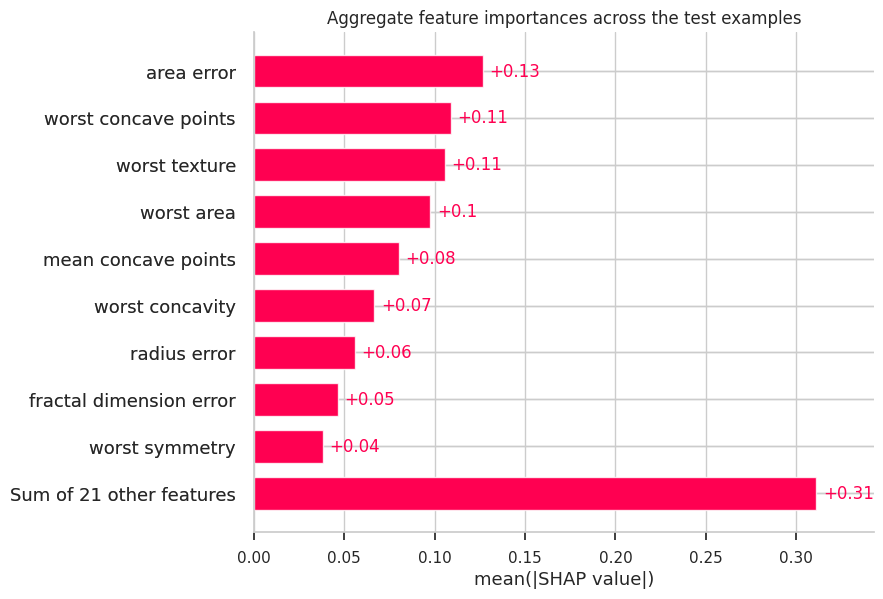

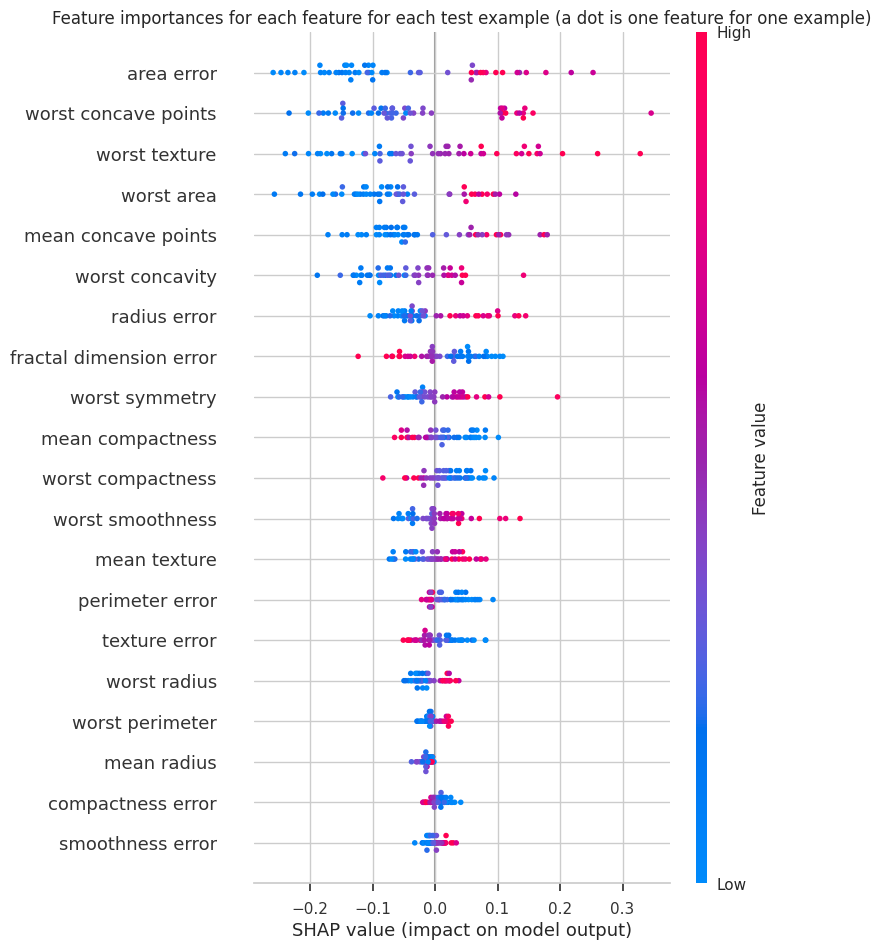

Now we analyze the strongest feature interactions of the most important feature, namely the feature "13".
CPU times: user 1min 13s, sys: 1.92 s, total: 1min 15s
Wall time: 1min 12s


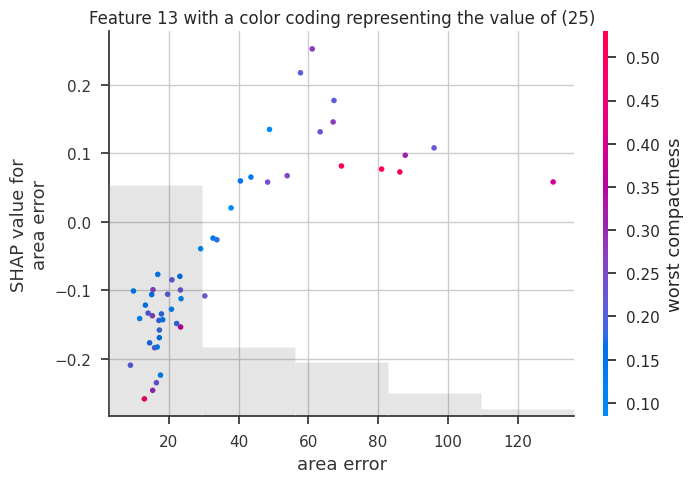

In [55]:
%%time
# With cuda: 1min 10s

from tabpfn_extensions import interpretability

# Load example dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
n_samples = 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Initialize and train model
clf = TabPFNClassifier(device='cuda', random_state=42)
clf.fit(X_train, y_train)

# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation", 
    device='cuda'
)

# Create visualization

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

fig = interpretability.shap.plot_shap(shap_values)


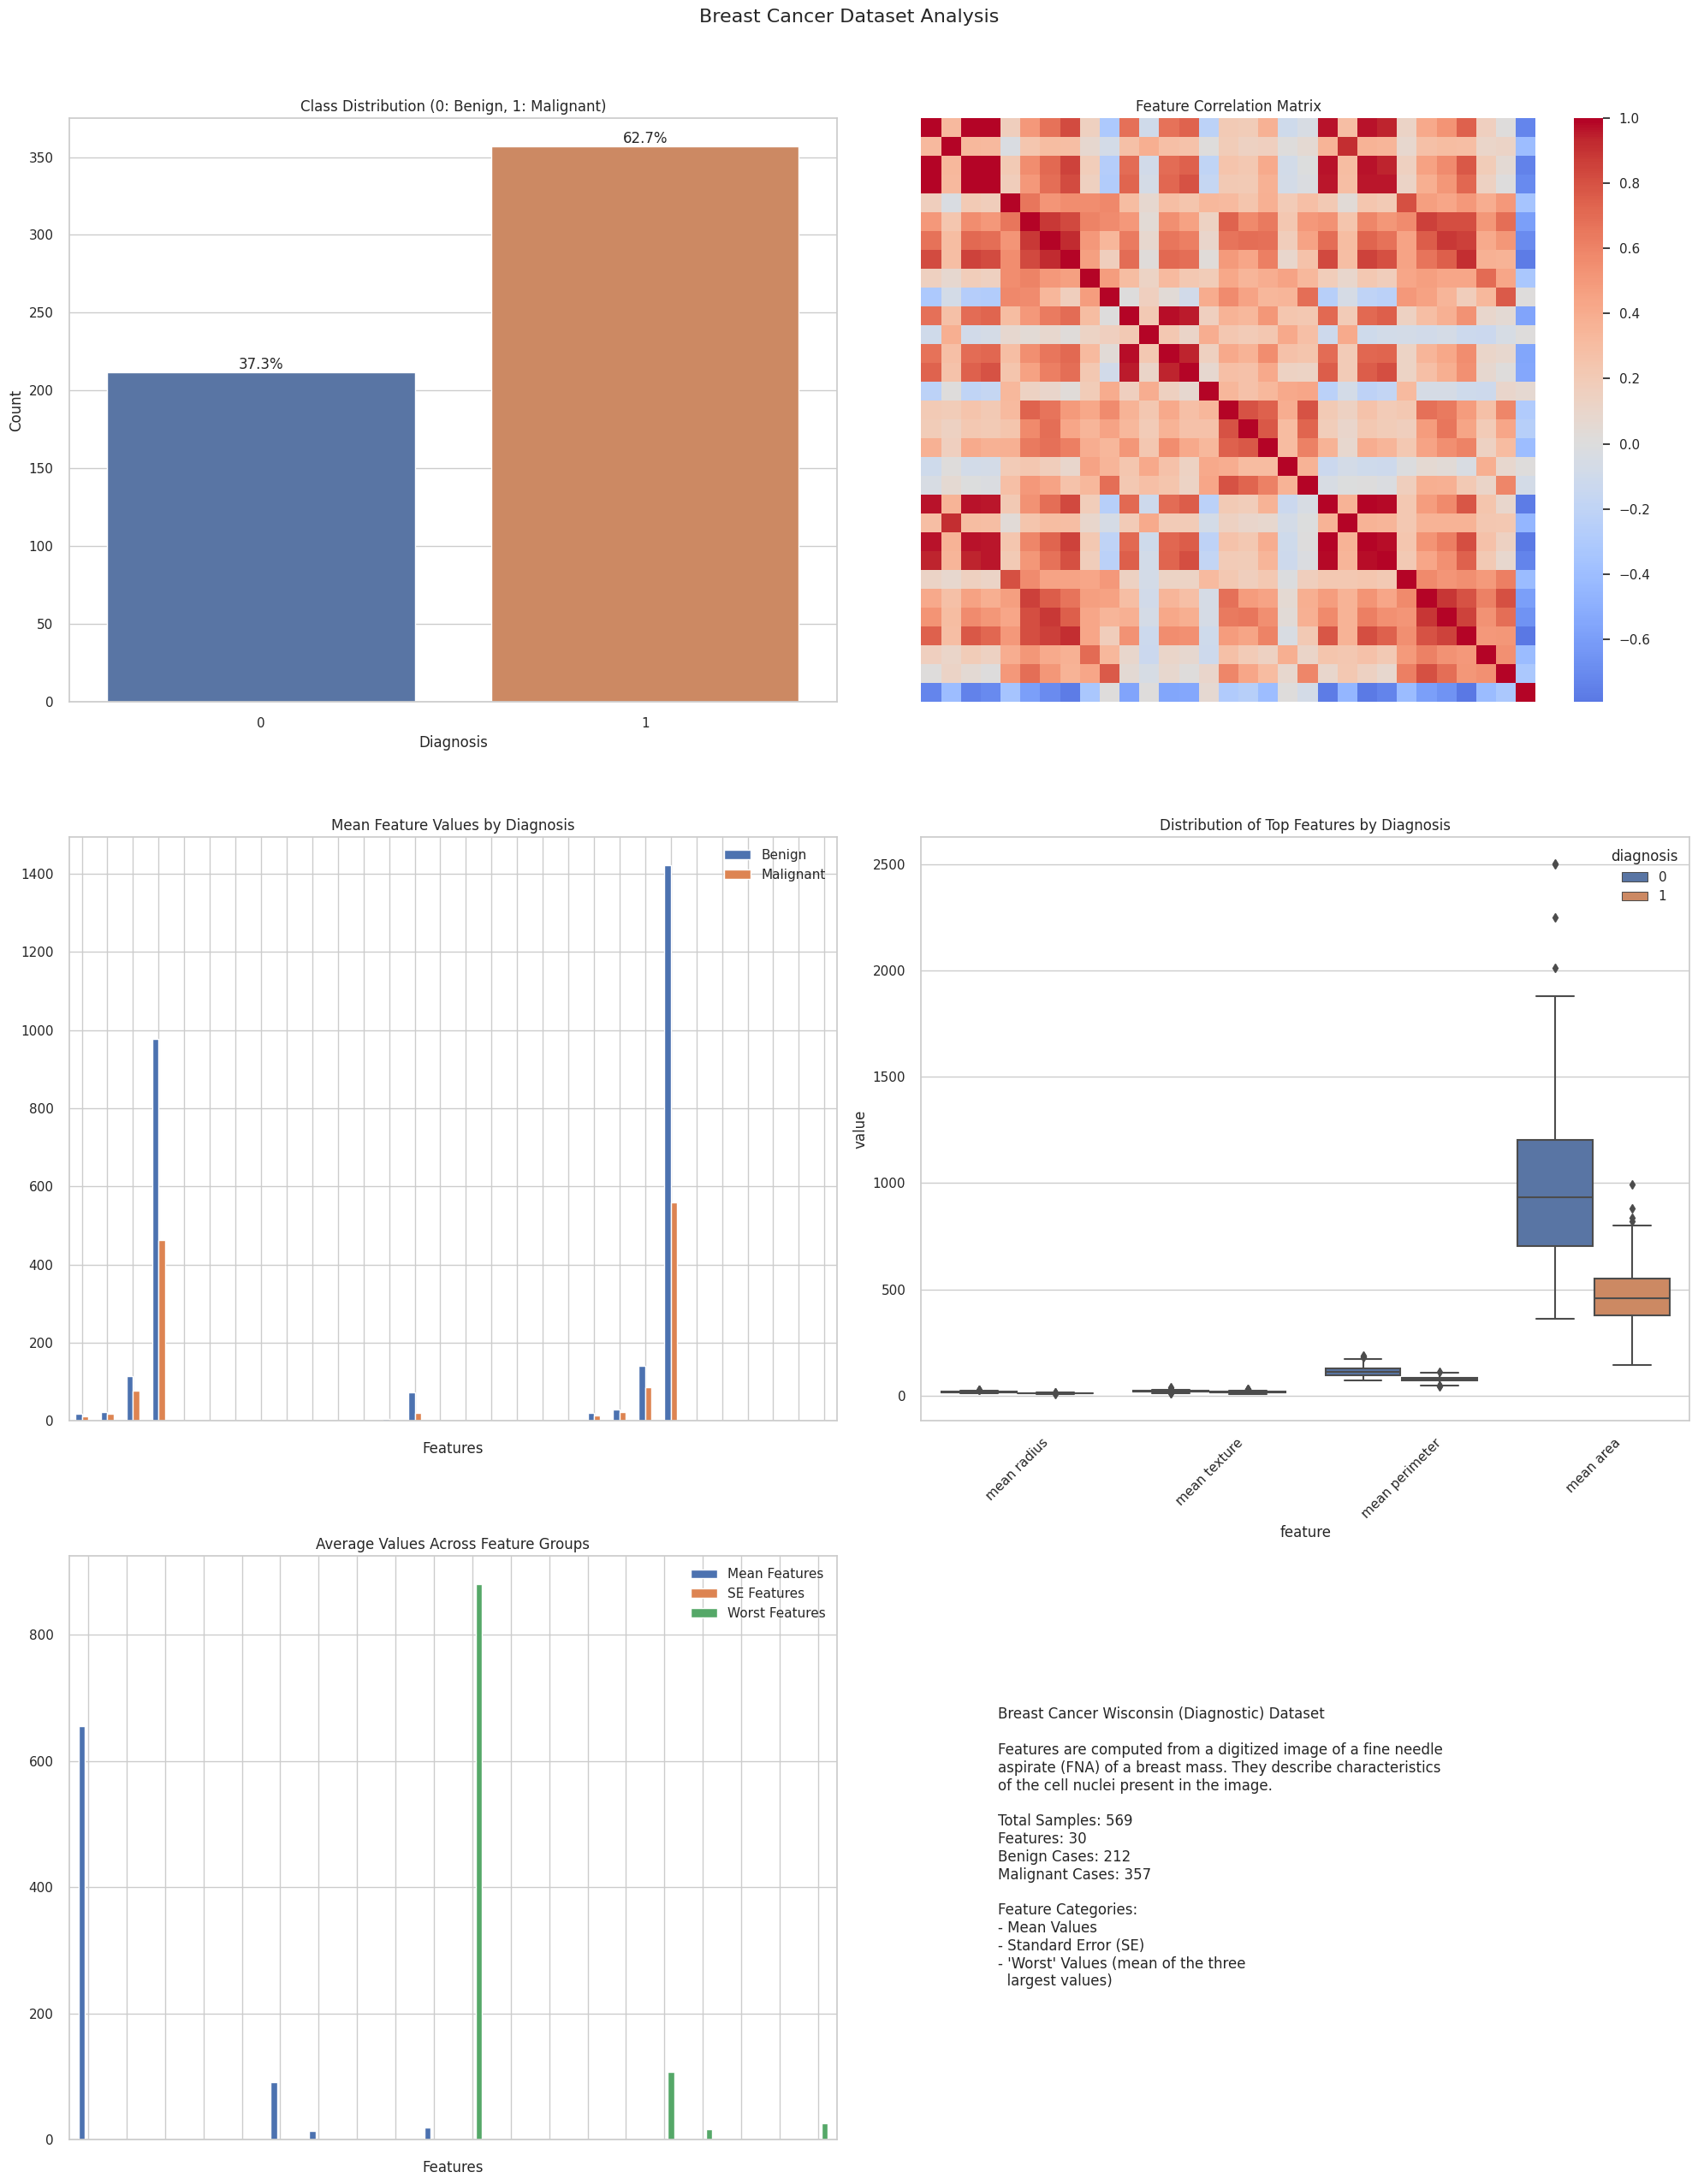


Breast Cancer Dataset Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius S

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Set seaborn style
sns.set_theme(style="whitegrid")

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Create DataFrame
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['diagnosis'] = y

# Create visualization grid
fig, axes = plt.subplots(3, 2, figsize=(20, 25))
fig.suptitle('Breast Cancer Dataset Analysis', fontsize=16, y=1.02)

# 1. Class Distribution
sns.countplot(data=df, x='diagnosis', ax=axes[0,0])
axes[0,0].set_title('Class Distribution (0: Benign, 1: Malignant)')
axes[0,0].set_xlabel('Diagnosis')
axes[0,0].set_ylabel('Count')

# Add percentage labels
total = len(df['diagnosis'])
for p in axes[0,0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[0,0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

# 2. Feature Correlations Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            xticklabels=False, yticklabels=False, ax=axes[0,1])
axes[0,1].set_title('Feature Correlation Matrix')

# 3. Mean Feature Values by Diagnosis
mean_features = df.groupby('diagnosis').mean()
mean_features.T.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Mean Feature Values by Diagnosis')
axes[1,0].set_xticklabels([])
axes[1,0].set_xlabel('Features')
axes[1,0].legend(['Benign', 'Malignant'])

# 4. Top Feature Distributions
top_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df_melt = df.melt(id_vars=['diagnosis'], 
                  value_vars=top_features,
                  var_name='feature', 
                  value_name='value')
sns.boxplot(data=df_melt, x='feature', y='value', hue='diagnosis', ax=axes[1,1])
axes[1,1].set_title('Distribution of Top Features by Diagnosis')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)

# 5. Feature Groups Visualization
mean_features = [col for col in df.columns if 'mean' in col]
se_features = [col for col in df.columns if 'se' in col]
worst_features = [col for col in df.columns if 'worst' in col]

df_means = df[mean_features].mean()
df_se = df[se_features].mean()
df_worst = df[worst_features].mean()

feature_groups = pd.DataFrame({
    'Mean Features': df_means,
    'SE Features': df_se,
    'Worst Features': df_worst
})

feature_groups.plot(kind='bar', ax=axes[2,0])
axes[2,0].set_title('Average Values Across Feature Groups')
axes[2,0].set_xticklabels([])
axes[2,0].set_xlabel('Features')

# 6. Dataset Information
axes[2,1].axis('off')
info_text = (
    "Breast Cancer Wisconsin (Diagnostic) Dataset\n\n"
    "Features are computed from a digitized image of a fine needle\n"
    "aspirate (FNA) of a breast mass. They describe characteristics\n"
    "of the cell nuclei present in the image.\n\n"
    f"Total Samples: {len(df)}\n"
    f"Features: {len(breast_cancer.feature_names)}\n"
    f"Benign Cases: {len(df[df['diagnosis'] == 0])}\n"
    f"Malignant Cases: {len(df[df['diagnosis'] == 1])}\n\n"
    "Feature Categories:\n"
    "- Mean Values\n"
    "- Standard Error (SE)\n"
    "- 'Worst' Values (mean of the three\n  largest values)"
)
axes[2,1].text(0.1, 0.5, info_text, fontsize=12, va='center')

plt.tight_layout()
plt.show()

# Print detailed dataset information
print("\nBreast Cancer Dataset Description:")
print("=" * 80)
print(breast_cancer.DESCR)

print("\nFeature Categories:")
print("-" * 80)
print("\n1. Mean Values:")
for feature in mean_features:
    print(f"   - {feature}")
print("\n2. Standard Error Values:")
for feature in se_features:
    print(f"   - {feature}")
print("\n3. Worst Values:")
for feature in worst_features:
    print(f"   - {feature}")

print("\nFeature Statistics:")
print("-" * 80)
print(df.describe())

print("\nClass Distribution:")
print("-" * 80)
class_dist = df['diagnosis'].value_counts(normalize=True) * 100
print("Percentage of cases:")
print(f"Benign: {class_dist[0]:.1f}%")
print(f"Malignant: {class_dist[1]:.1f}%")

## Feature selection

Breast cancer dataset

In [57]:
%%time
from tabpfn_extensions import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=3, device='cuda', random_state=42)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names,
    device='cuda'
)

# Print selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if sfs.get_support()[i]]
print("\nSelected features:")
for feature in selected_features:
    print(f"- {feature}")

Score with all features: 0.9789163173420278 +/- 0.004272373468269595
Score with selected features: 0.98067070330694 +/- 0.008588584764482985
Features selected by forward sequential selection: ['symmetry error', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness']

Selected features:
- symmetry error
- worst texture
- worst perimeter
- worst area
- worst smoothness
CPU times: user 6min 49s, sys: 10.9 s, total: 7min
Wall time: 2min 8s


## Feature Selection in TabPFN

### Overview
Feature selection helps identify the most important features for model prediction, which can improve model performance, reduce overfitting, and provide better interpretability.

### Code Structure

```python
from tabpfn_extensions import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=3, device='cuda', random_state=42)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names,
    device='cuda'
)
```

### Components Explained

####  1. Data Preparation
- Loads the breast cancer dataset
- Separates features (X) and target (y)
- Gets feature names for interpretation

#### 2. Model Initialization
- Creates TabPFN classifier with:
  - `n_estimators=3`: Number of ensemble models
  - `device='cuda'`: Uses GPU acceleration
  - `random_state=42`: Sets seed for reproducibility

#### 3. Feature Selection Process
The `feature_selection` function implements:
- Sequential Forward Selection (SFS)
- Evaluates features based on model performance
- Selects top N features (`n_features_to_select=5`)

### How It Works

1. **Sequential Forward Selection**:
   - Starts with no features
   - Iteratively adds features that improve performance most
   - Continues until reaching desired number of features

2. **Performance Evaluation**:
   - Tests different feature combinations
   - Uses cross-validation for robust evaluation
   - Measures improvement in model accuracy

3. **Feature Ranking**:
   - Ranks features by their importance
   - Returns selected feature indices
   - Maps indices to feature names

### Output Interpretation

```python
selected_features = [feature_names[i] for i in range(len(feature_names)) 
                    if sfs.get_support()[i]]
```

- Returns boolean mask of selected features
- Maps selected indices to feature names
- Provides list of most important features

### Benefits

1. **Model Optimization**:
   - Reduces dimensionality
   - Improves model efficiency
   - Reduces training time

2. **Interpretability**:
   - Identifies key features
   - Helps understand model decisions
   - Provides insights into data

3. **Performance**:
   - Reduces overfitting
   - Improves generalization
   - Optimizes model accuracy

### Usage Tips

1. **Number of Features**:
   - Start with smaller subset
   - Gradually increase if needed
   - Monitor performance changes

2. **Cross-validation**:
   - Use cross-validation for selection
   - Ensures robust feature selection
   - Avoids selection bias

3. **Feature Interpretation**:
   - Analyze selected features
   - Consider domain knowledge
   - Validate selections with experts

### Limitations

1. **Computational Cost**:
   - Can be computationally intensive
   - Scales with feature count
   - May require optimization

2. **Feature Interactions**:
   - May miss feature interactions
   - Consider correlation structure
   - Validate with domain expertise

3. **Dataset Specificity**:
   - Results specific to dataset
   - May need revalidation
   - Consider data distribution

### Best Practices

1. **Preprocessing**:
   - Scale features appropriately
   - Handle missing values
   - Remove redundant features

2. **Validation**:
   - Use cross-validation
   - Test on holdout set
   - Compare with baseline

3. **Documentation**:
   - Document selection criteria
   - Record performance metrics
   - Note feature importance

This feature selection implementation provides a robust way to identify the most important features for your TabPFN model, improving both performance and interpretability.


# Unsupervised

## Data Generation / Outlier Detection

Data generation form breast cancer dataset
X.shape: (569, 30)
y.shape: (569,)
feature_names.shape: (30,)
Number of features: 30
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Features selected: [4, 6, 12]
Names of features selected: ['mean smoothness' 'mean concavity' 'perimeter error']
Number of samples: 1138



  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


CPU times: user 10.1 s, sys: 419 ms, total: 10.5 s
Wall time: 4.88 s


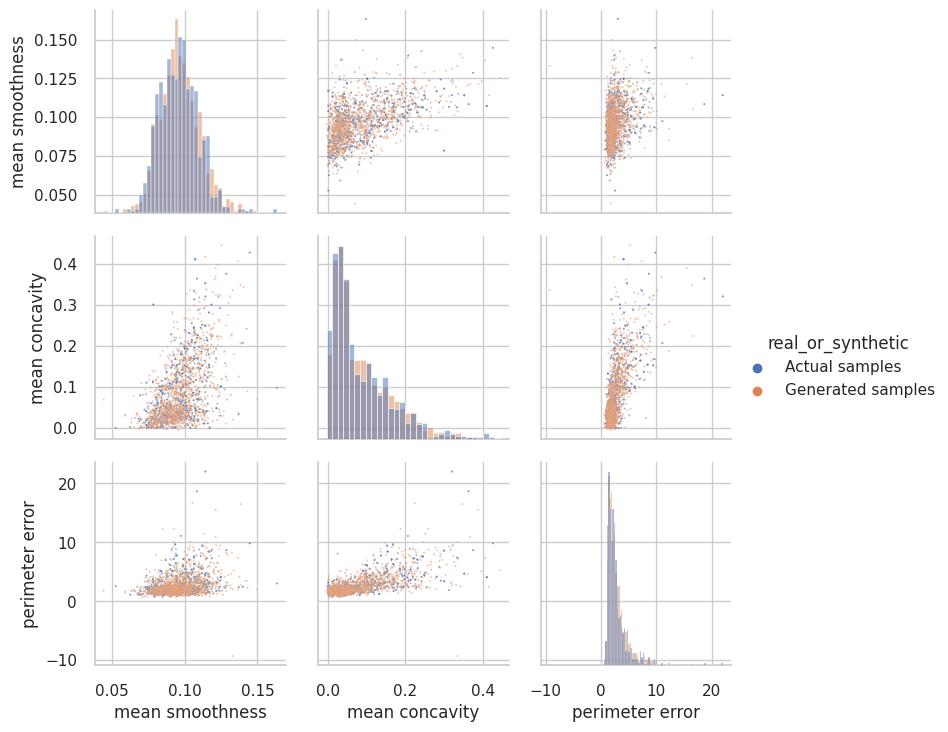

In [58]:
%%time

from tabpfn_extensions import unsupervised

# Load and prepare breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df['data'], df['target']
feature_names = df['feature_names']

# Initialize TabPFN models
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=TabPFNClassifier(),
    tabpfn_reg=TabPFNRegressor()
)

# Select features for synthetic data generation
# Example features: [mean texture, mean area, mean concavity]
feature_indices = [4, 6, 12]

# Run synthetic data generation experiment
experiment = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type='unsupervised'
)

# Print shapes of data
print('========\nData generation form breast cancer dataset\n========')
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')
print(f'feature_names.shape: {feature_names.shape}')    
# Generating synthetic data: 1min 10s   
# Print number of features and features names 
print(f'Number of features: {len(feature_names)}')
print(f'Features names: {feature_names}')
# Features selected: 
print(f'Features selected: {feature_indices}')
# Names of features selected: 
print(f'Names of features selected: {feature_names[feature_indices]}')
no_samples = X.shape[0] * 2
print(f'Number of samples: {no_samples}\n')

results = experiment.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=feature_names,
    temp=1.0,  # Temperature parameter for sampling
    n_samples=X.shape[0] * 2,  # Generate twice as many samples as original data
    indices=feature_indices
)

This figure shows a comparison between actual and generated (synthetic) samples across three different features from what appears to be the breast cancer dataset. The visualization is arranged in a 3x3 grid showing different relationships and distributions:

1. **Top Row (Mean Smoothness)**:
   - Left: Histogram showing the distribution of mean smoothness values
   - Middle & Right: Scatter plots comparing mean smoothness with other features
   - Shows a relatively normal distribution with most values concentrated between 0.075-0.125

2. **Middle Row (Mean Concavity)**:
   - Shows relationships between mean concavity and other features
   - Center plot shows the distribution of mean concavity values
   - Values range from 0.0 to 0.4, with most concentrated in lower ranges
   - Blue dots represent actual samples, orange dots represent generated samples

3. **Bottom Row (Perimeter Error)**:
   - Shows relationships between perimeter error and other measurements
   - Values mostly range from -10 to 20
   - Right plot shows the distribution of perimeter error values
   - Shows how the synthetic data generator captures the relationships between features

Key Observations:
- The synthetic samples (orange) generally follow similar patterns to the actual samples (blue)
- There's good overlap between real and generated distributions
- The model captures both the marginal distributions and the relationships between features
- Some slight differences in density and spread between real and synthetic data points
- The generated samples maintain the correlations present in the original dataset

This visualization helps validate the quality of the synthetic data generation by showing how well it preserves the statistical properties and relationships of the original dataset.


## Outlier detection

Breast cancer dataset

CPU times: user 5.23 s, sys: 2.48 s, total: 7.7 s
Wall time: 1.51 s


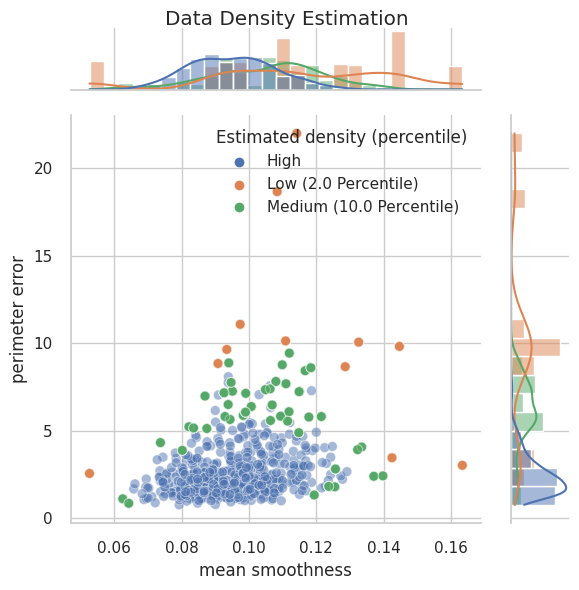

In [59]:
%%time

import torch
from sklearn.datasets import load_breast_cancer
from tabpfn_extensions import unsupervised
from tabpfn_extensions import TabPFNClassifier, TabPFNRegressor

# Load data
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Initialize models
clf = TabPFNClassifier(n_estimators=4)
reg = TabPFNRegressor(n_estimators=4)
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf, tabpfn_reg=reg
)

# Run outlier detection
exp_outlier = unsupervised.experiments.OutlierDetectionUnsupervisedExperiment(
    task_type="unsupervised"
)
results = exp_outlier.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=attribute_names,
    indices=[4, 12],  # Analyze features 4 and 12
)

This figure shows the results of an outlier detection analysis on the breast cancer dataset, specifically examining the relationship between mean smoothness and perimeter error features:

1. **Main Scatter Plot (Left)**:
   - X-axis: Mean smoothness (ranges from 0.06 to 0.16)
   - Y-axis: Perimeter error (ranges from 0 to 20)
   - Points are color-coded by density estimation:
     - Blue points: High density regions (normal cases)
     - Green points: Medium density (10.0 percentile)
     - Orange points: Low density (2.0 percentile, potential outliers)

2. **Density Plots**:
   - Top: Shows the distribution of mean smoothness
   - Right: Shows the distribution of perimeter error
   - Both use kernel density estimation (KDE) curves
   - Different colors represent different density levels

3. **Key Observations**:
   - Most data points cluster in the blue region (0.08-0.12 mean smoothness, 0-5 perimeter error)
   - Outliers (orange points) appear in:
     - High perimeter error regions (>10)
     - Extreme mean smoothness values (<0.06 or >0.14)
   - The distribution shows a slight positive correlation between the two features

4. **Outlier Detection**:
   - Uses unsupervised learning approach
   - Identifies outliers based on density estimation
   - Three-level classification (High/Medium/Low density)
   - Clear separation between normal and anomalous cases

This visualization is particularly useful for:
- Identifying abnormal patterns in the data
- Understanding the distribution of features
- Detecting potential measurement errors or unusual cases
- Supporting quality control in medical diagnostics
